In [1]:
from breaking_detection import Case, Config
import numpy as np
from matplotlib import pyplot as plt
import sys
import tqdm as tqdm
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence')
from prepare import load_object, save_object  
from fio import readin
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/grl.mplstyle')
import pandas as pd

In [2]:
def read(name, skip = None):
    energy, exists = readin(name, table_delimiter = ' ', 
                            table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

In [3]:
config2_1 = Config(L0=200, P=0.01, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_')
# level 10
case = config2_1.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/')
case = config2_1.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, Npower=2, prefix='', postfix='Htheta%g_N2/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N2/')
case = config2_1.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, Npower=10, prefix='', postfix='Htheta%g_N10/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N10/')

config2_2 = Config(L0=200, P=0.02, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_')
# level 10
case = config2_2.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/')
case = config2_2.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, Npower=2, prefix='', postfix='Htheta%g_N2/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N2/')
case = config2_2.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, Npower=10, prefix='', postfix='Htheta%g_N10/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N10/')

config2_9 = Config(L0=200, P=0.008, kp=2*np.pi/40, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_')
case = config2_9.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                                 path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/')

config2_10 = Config(L0=200, P=0.016, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_')
case = config2_10.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                                  path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/')

config3_2 = Config(L0=500, P=0.05, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_')
case = config3_2.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                                 path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/')

config3_3 = Config(L0=500, P=0.07, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_')
case = config3_3.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                                 path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/')

In [4]:
config_set1 = [config2_9,config2_1,config2_10,config2_2] # Choice of configurations
config_set2 = [config3_2,config3_3]
config_set = [*config_set1, *config_set2] 

In [5]:
""" Compute the breaking stats """
tseries_ensem = []
for i in range(0,4):
    tstart = 100 + 20*i
    dt = 0.2
    tseries = np.arange(tstart, tstart+20, dt)
    tseries_ensem.append(tseries)

""" Compute the energy loss (without filtering) and the breaking stats """
for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            print (case.path)
            energy = read(case.path +'energy_after_remap.dat')
            case.dEkdt = []; case.dEpdt = []
            for tseries in tseries_ensem:
                print('From t = %g to %g.' %(tseries[0], tseries[-1]))
                idx1 = (np.abs(energy.t - tseries[0])).argmin()
                idx2 = (np.abs(energy.t - tseries[-1])).argmin()
                dEkdt = (energy['ke'].values[idx1] - energy['ke'].values[idx2])/(tseries[-1]-tseries[0])
                dEpdt = (energy['gpe'].values[idx1] - energy['gpe'].values[idx2])/(tseries[-1]-tseries[0])           
                case.dEkdt.append(dEkdt); case.dEpdt.append(dEpdt)
            case.dEkdt = np.array(case.dEkdt); case.dEpft = np.array(dEpdt)
            case.dEdt = (case.dEkdt + case.dEpdt)/case.config.L0**2 # dissipation per area
            print(case.dEdt)
            
            ''' If from scratch '''
#             case.time_window(tseries_ensem, threshold=0, bins=[])
            ''' If restore from pickle '''
            picklename = case.path + 'breakingstat.pkl'
            case.hist_ensem = load_object(picklename)
            
# """ Pickle the breaking statistics """
# for k, config in enumerate(config_set[:4]):
#     for case in config.cases:
#         if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             picklename = case.path + 'breakingstat.pkl'
#             save_object(case.hist_ensem, picklename)

/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
[0.00015997 0.00014949 0.00018636 0.00013801]


/tmp/ipykernel_141132/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',


/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
[0.00063864 0.00078813 0.00037424 0.00031553]
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
[0.00099899 0.00107323 0.00054306 0.00042348]


### Output data for Luc to test

In [18]:
label1 = ['case1', 'case2', 'case3', 'case4']
label2 = ['t=100-120s', 't=120-140s', 't=140-160s', 't=160-180s']

# df = pd.Series(columns=['case', 'time_window', 'sigma', 'Hs', 'dEdt', 'label'], dtype=['string','string','float','float','float','int'])
case_out=[]; tw_out=[]; sigma_out=[]; Hs_out=[]; dEdt_out=[]
for k, config in enumerate(config_set[:4]): 
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            for i, tseries in enumerate(tseries_ensem):
                case_out.append(label1[k])
                tw_out.append(label2[i])
                sigma_out.append(case.sigma[i])
                Hs_out.append(case.Hs[i])
                dEdt_out.append(case.dEdt[i])

# df = pd.concat(series, axis=1)
df = pd.DataFrame(list(zip(case_out,tw_out,sigma_out,Hs_out,dEdt_out)), columns=['case', 'time_window', 'sigma', 'Hs', 'dEdt (m3s-1)'])

In [23]:
df = df.round({'sigma': 5, 'Hs': 5, 'dEdt':7})
df.to_csv('data_dissipation/metadata_Luc.csv', encoding='utf-8', index=False, float_format='%.10f')

In [28]:
''' Write the Lambda(c) distribution '''
label = 1
for k, config in enumerate(config_set[:4]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                bins = case.hist_ensem['bins']
                bins_plotting = bins[1:] - (bins[2] - bins[1])/2
                lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                df = pd.DataFrame(list(zip(bins_plotting, lambdac)), columns=['c (ms-1)', 'Lambda(c) (m-2s)'])
                df.to_csv('data_dissipation/Lambdac%g.csv' %label, encoding='utf-8', index=False)
                label = label + 1
                
def get_spectrum (eta, L, N):
    kmod, theta, Fkmod = spectrum_integration_log(eta, CHECK=False, L=L, N=N)
    mu, Hs = steepness_trunc_non_uniform (Fkmod, kmod)
    mu_plateau = mu[-1]
#     Hskp = np.var(eta)**0.5*4*case.config.kp
#     config.kmod, config.Fkmod = case.kmod, case.Fkmod
    return kmod, Fkmod

''' Write the spectrum (in the middle of the time window) '''
label = 1
for k, config in enumerate(config_set[:4]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            for i, tseries in enumerate(tseries_ensem):
                t = (tseries_ensem[i][0] + tseries_ensem[i][-1]) / 2
                eta = case.read_t(fieldname='eta', t=t)
                L = case.config.L0; N = 2**case.LEVEL
                kmod, Fkmod = get_spectrum (eta, L, N)
                df = pd.DataFrame(list(zip(kmod, Fkmod)), columns=['k (m-1)', 'phi(k) (m3)'])
                df.to_csv('data_dissipation/phi_k%g.csv' %label, encoding='utf-8', index=False)
                label = label + 1

### Plot energy and dissipation for all cases

In [8]:
''' Compute spectrum and assign color '''
from spectrum_func import spectrum_integration_log, steepness_trunc_non_uniform, spectrum_integration_linear

def get_mss_Hs_spectrum (eta, L, N):
    kmod, theta, Fkmod = spectrum_integration_log(eta, CHECK=False, L=L, N=N)
    mu, Hs = steepness_trunc_non_uniform (Fkmod, kmod)
    Hs = np.var(eta)**0.5*4
#     config.kmod, config.Fkmod = case.kmod, case.Fkmod
    return mu[-1], Hs, kmod, Fkmod
            
for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            case.sigma = []
            case.Hs = []
            case.Fkmod = []
            for i, tseries in enumerate(tseries_ensem):
                t = (tseries[0] + tseries[-1]) / 2
                eta = case.read_t(fieldname='eta', t=t) 
                L = case.config.L0; N = 2**case.LEVEL
                slope, Hs, kmod, Fkmod = get_mss_Hs_spectrum (eta, L, N)
                case.sigma.append(slope)
                case.Hs.append(Hs)
                case.Fkmod.append(Fkmod)
            case.kmod = kmod
            case.sigma = np.array(case.sigma) 
            case.Hs = np.array(case.Hs) 
            case.cc = plt.cm.get_cmap('Oranges')((case.sigma[0]-0.05)/0.15)

# for k, config in enumerate(config_set[:4]):
#     for case in config.cases:
#         if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             plt.plot(case.sigma, case.dEkdt, '-o', c=case.cc)
#             plt.plot(case.sigma, case.dEpdt, '-x', c=case.cc)
#             plt.plot(case.sigma, case.dEdt, '-s', c=case.cc)

In [72]:
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
# mpl.rcParams['text.usetex'] = True 
# plt.rc('text.latex', preamble=r'\usepackage{lmodern}')
# mpl.rcParams['font.family'] = 'sans serif'
# mpl.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'

# mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
# font.family:   sans serif
# font.sans-serif:  Computer Modern Sans serif

# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
# params = {'text.usetex' : True,
#                     'font.size' : 11,
#                     'font.family' : 'lmodern'}
# plt.rcParams.update(params)

mpl.rcParams['text.usetex'] = True 
# plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'

In [73]:
''' We need to smooth out the Ek and Ep curves otherwise the oscillation is going to impede dEk/dt and dEp/dt calculation'''
import matplotlib as mpl
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
fig, axes = plt.subplots (1, 2, figsize=[5.2,2])

ax = axes[0]
for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            print (case.path)
            case.energy = read(case.path +'energy_after_remap.dat')
            
            window_size = 10
            windows = case.energy.rolling(10)
            moving_averages = windows.mean()
            ax.plot(moving_averages.t, 2*moving_averages.ke/(case.energy.ke[0]+case.energy.gpe[0]), '--', c=case.cc)
            ax.plot(moving_averages.t, 2*moving_averages.gpe/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=case.cc)
            ax.plot(case.energy.t, (case.energy.ke+case.energy.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), 
                     alpha=0.5, lw=2, c=case.cc)
            
            case.dEkdt = []; case.dEpdt = []            
            for tseries in tseries_ensem:
                print('From t = %g to %g.' %(tseries[0], tseries[-1]))
                idx1 = (np.abs(moving_averages.t - tseries[0])).argmin()
                idx2 = (np.abs(moving_averages.t - tseries[-1])).argmin()
                dEkdt = (moving_averages.ke[idx1] - moving_averages.ke[idx2])/(tseries[-1]-tseries[0])
                dEpdt = (moving_averages.gpe[idx1] - moving_averages.gpe[idx2])/(tseries[-1]-tseries[0])           
                case.dEkdt.append(dEkdt); case.dEpdt.append(dEpdt)
            case.dEkdt = np.array(case.dEkdt); case.dEpft = np.array(dEpdt)
            
for xloc in (100,120,140,160,180):            
    ax.axvline(x=xloc, color = 'k', linestyle = '--')
ax.set_xlabel('$t\;\mathrm{(s)}$'); ax.set_xlim([0,200])
ax.set_ylabel('$E(t)/E_0$'); ax.set_ylim([0.8,1.05])
ax.set_xticks([0,40,80,120,160,200])
ax.annotate('tw1',(101,0.81), fontsize=6)
ax.annotate('tw2',(121,0.81), fontsize=6)
ax.annotate('tw3',(141,0.81), fontsize=6)
ax.annotate('tw4',(161,0.81), fontsize=6)

ax2  = fig.add_axes([0.15,0.2,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=6)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

""" Energy dissipation distribution from Lambda(c). """
ax = axes[1]
lines = ['-o','-x','-s','-^']

for k, config in enumerate(config_set[:4]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#             case.cc = 'k'
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            case.zeroth_ensem = []
            case.first_ensem = []
            case.fifth_ensem = []
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    case.cp = (9.8/config.kp)**0.5
                    lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                    ax.plot(bins_plotting/case.cp, lambdac*bins_plotting**5, lines[i], 
                            c=plt.cm.get_cmap('Oranges')((case.sigma[i]-0.05)/0.15), alpha=1, lw=0.5)            # The extra filter 
                    case.zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    case.first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))
                    case.fifth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting**5))

''' For legends '''
lls = []
case = config_set[3].cases[0]
bins = case.hist_ensem['bins']
bins_plotting = bins[1:] - (bins[2] - bins[1])/2
for i,hist in enumerate(case.hist_ensem['hist_ensem']):
    case.cp = (9.8/config.kp)**0.5
    lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
    ll, = ax.plot(bins_plotting/case.cp, lambdac*bins_plotting**5, lines[i], 
                  c=plt.cm.get_cmap('Oranges')((case.sigma[i]-0.05)/0.15), alpha=1, lw=0.5)            # The extra filter 
    lls.append(ll)
    

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim([0.1,2])
ax.set_ylim([10**(-4),10**(0)])
ax.set_xlabel(r'$c/c_p$')
ax.set_ylabel(r'$\Lambda(c)c^5 \;\mathrm{(m^{3}s^{-4})}$')
legend1 = ax.legend([lls[0],lls[1],lls[2],lls[3]], ['tw1', 'tw2', 'tw3', 'tw4'], fontsize=6, 
                    handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=2, bbox_to_anchor=(0.697, 0.4))
ax.add_artist(legend1)

plt.subplots_adjust(wspace=0.3)


/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
From t = 100 to 119.8.
From t = 120 to 139.8.
From t = 140 to 159.8.
From t = 160 to 179.8.
P=0.008
P=0.01
P=0.016
P=0.02


/tmp/ipykernel_141132/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_141132/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_141132/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_141132/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode
(../710dfe63538cc777f73c7e25cc84fc7a.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))

! LaTeX Error: File `sfmath.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.11 \makeatletter
                  \@ifpackageloaded{underscore}{}{\usepackage[strings]{under...
No pages of output.
Transcript written on 710dfe63538cc777f73c7e25cc84fc7a.log.




<Figure size 3120x1200 with 3 Axes>

In [44]:
import matplotlib.pyplot as plt

circle123 = "\N{CIRCLED DIGIT ONE}\N{CIRCLED DIGIT TWO}\N{CIRCLED DIGIT THREE}"
mpl.rcParams['text.usetex'] = True

tests = [
    r'$%s\;\mathrm{%s}\;\mathbf{%s}$' % ((circle123,) * 3),
    r'$\mathsf{Sans \Omega}\;\mathrm{\mathsf{Sans \Omega}}\;'
    r'\mathbf{\mathsf{Sans \Omega}}$',
    r'$\mathtt{Monospace}$',
    r'$\mathcal{CALLIGRAPHIC}$',
    r'$\mathbb{Blackboard\;\pi}$',
    r'$\mathrm{\mathbb{Blackboard\;\pi}}$',
    r'$\mathbf{\mathbb{Blackboard\;\pi}}$',
    r'$\mathfrak{Fraktur}\;\mathbf{\mathfrak{Fraktur}}$',
    r'$\mathscr{Script}$',
]

fig = plt.figure(figsize=(8, len(tests) + 2))
for i, s in enumerate(tests[::-1]):
    fig.text(0, (i + .5) / len(tests), s, fontsize=32)

plt.show()

<Figure size 4800x6600 with 0 Axes>

[0.0183076  0.02132082 0.01965479 0.01853647]
[0.01185979 0.01638261 0.0144488  0.01430717]
[0.0138625  0.01206451 0.01252235 0.01445939]
[0.01285154 0.01083662 0.01003447 0.00960963]


(0.09, 0.16)

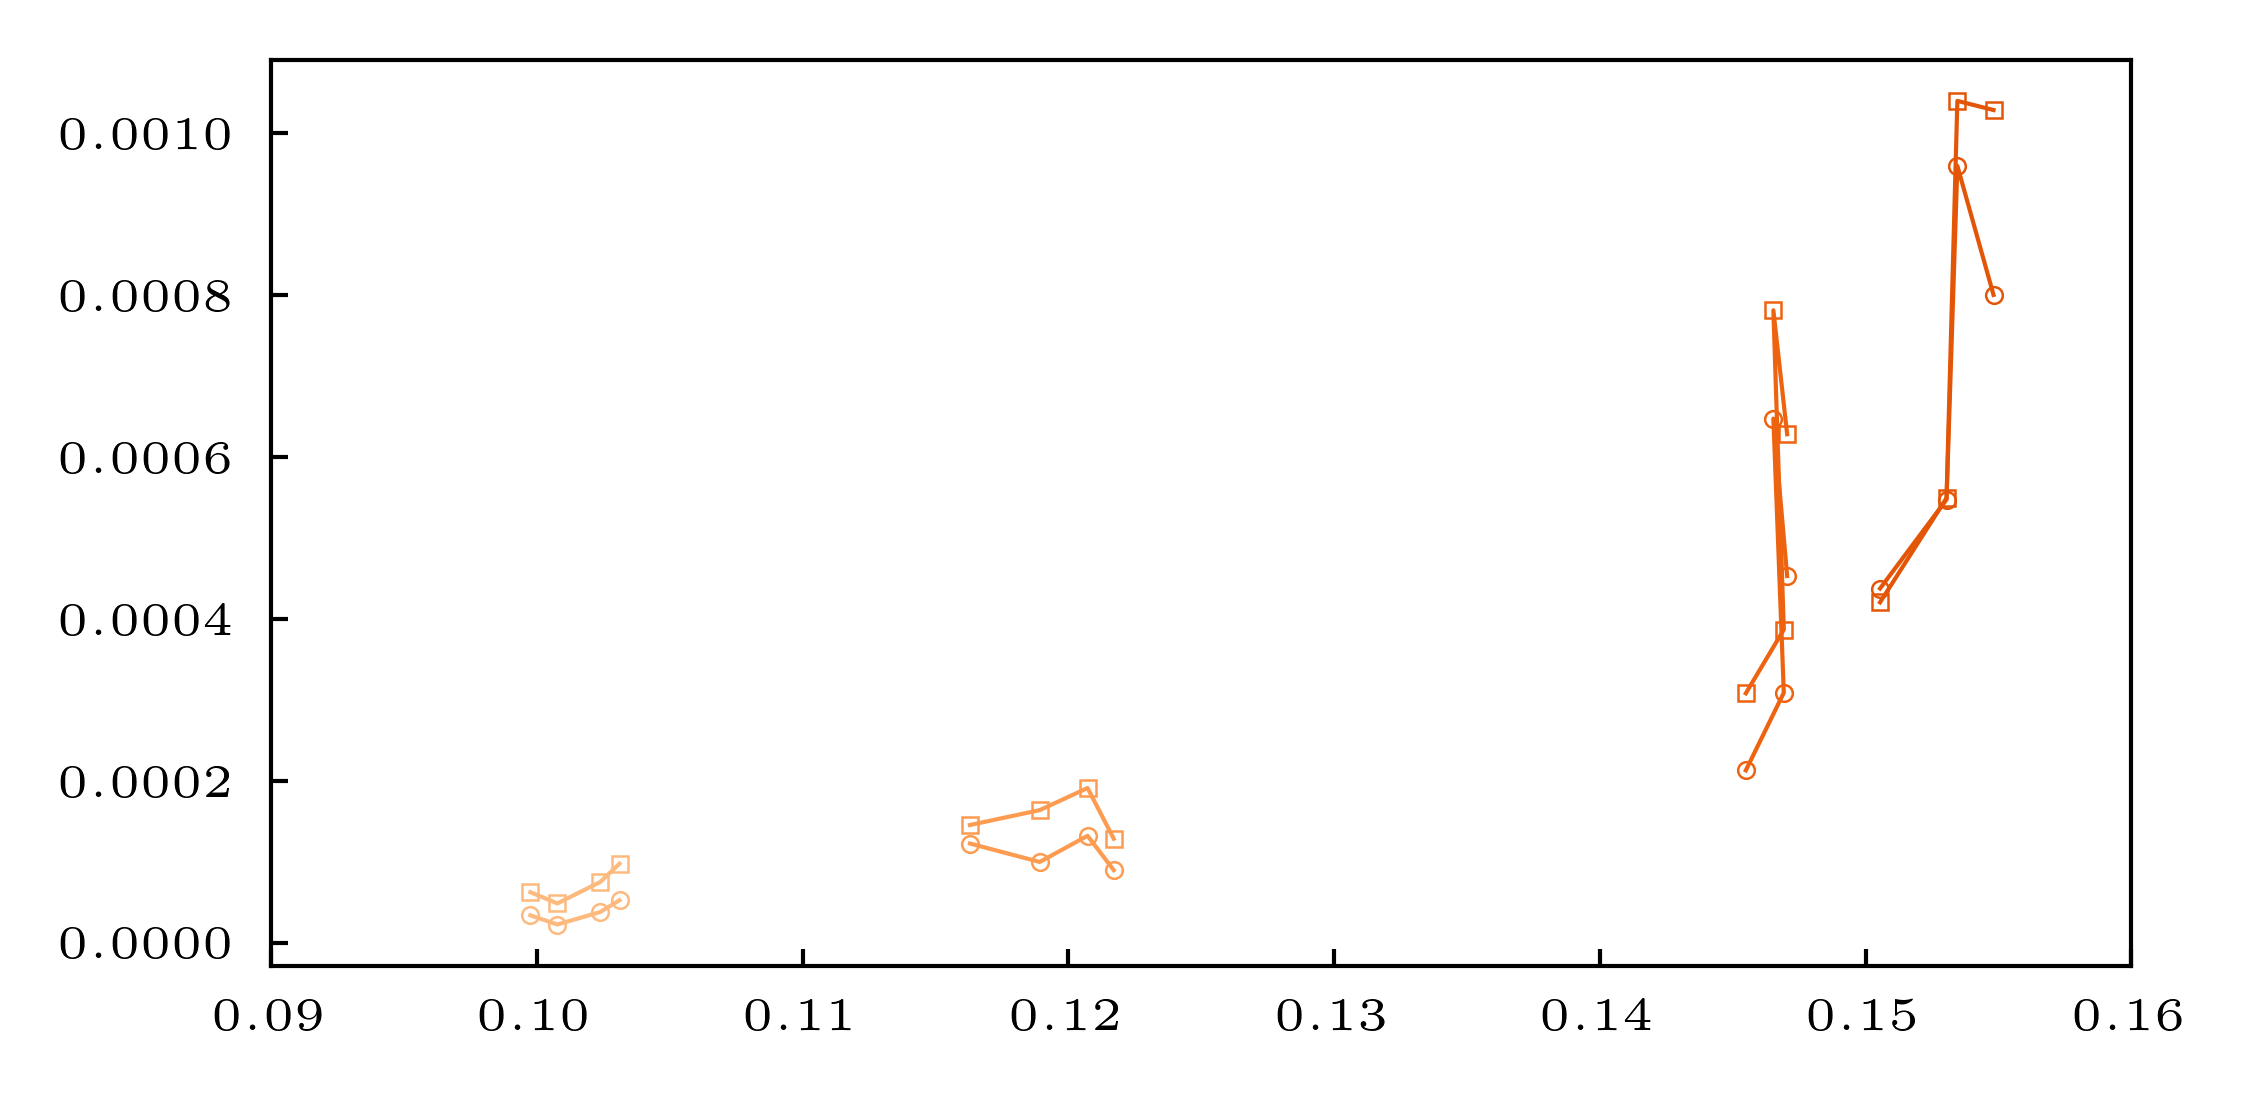

In [97]:
from spectrum_func import spectrum_integration_log, steepness_trunc_non_uniform, spectrum_integration_linear
fig = plt.figure(figsize=[4,2])

def get_mss (eta, L, N):
    kmod, theta, Fkmod = spectrum_integration_log(eta, CHECK=False, L=L, N=N)
    mu, Hs = steepness_trunc_non_uniform (Fkmod, kmod)
    mu_plateau = mu[-1]
#     Hskp = np.var(eta)**0.5*4*case.config.kp
#     config.kmod, config.Fkmod = case.kmod, case.Fkmod
    return mu_plateau

''' Get the sigma in the middle of the time window, but choose color to be the first sigma '''
# for k, config in enumerate(config_set[:4]):
#     for case in config.cases:
#         if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             case.sigma = []
#             for i, tseries in enumerate(tseries_ensem):
#                 t = (tseries[0] + tseries[-1]) / 2
#                 eta = case.read_t(fieldname='eta', t=t) 
#                 L = case.config.L0; N = 2**case.LEVEL
#                 slope = get_mss (eta, L, N)
#                 case.sigma.append(slope)
#             case.sigma = np.array(case.sigma) 
#             case.cc = plt.cm.get_cmap('Oranges')((case.sigma[0]-0.05)/0.15)

for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             plt.plot(case.sigma, case.dEkdt, '-o', c=case.cc)
#             plt.plot(case.sigma, case.dEpdt, '-x', c=case.cc)
            plt.plot(case.sigma, case.dEdt/case.config.L0**2, '-s', c=case.cc)
            plt.plot(case.sigma, np.array(case.fifth_ensem)*0.01/9.8, '-o', c=case.cc)
            case.bconstant = case.dEdt/case.config.L0**2/(case.fifth_ensem)*9.8
            print(case.bconstant)

# plt.ylim([0,60])
plt.xlim([0.09,0.16])

Text(0, 0.5, '$\\epsilon=dE/dt$')

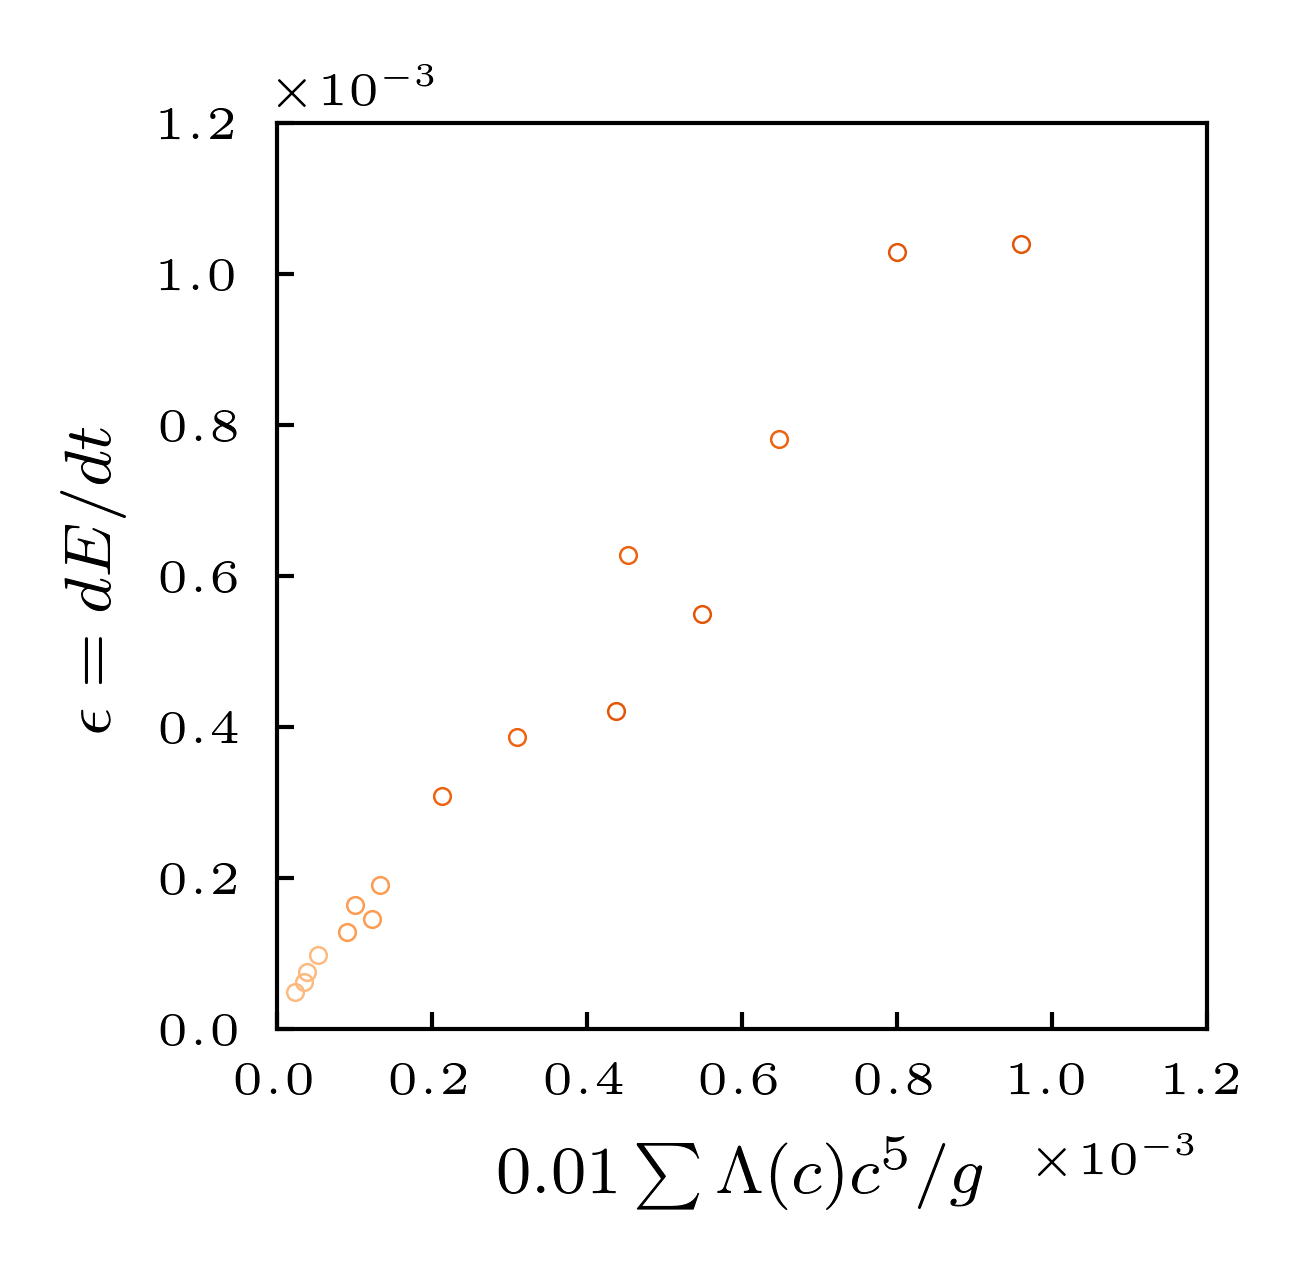

In [156]:
fig = plt.figure(figsize=[2,2]); ax = plt.gca()
for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             plt.plot(case.sigma, case.dEkdt, '-o', c=case.cc)
#             plt.plot(case.sigma, case.dEpdt, '-x', c=case.cc)
            plt.plot(np.array(case.fifth_ensem)*0.01/9.8, case.dEdt/case.config.L0**2, 'o', c=case.cc)
#             case.bconstant = case.dEdt/case.config.L0**2/(case.fifth_ensem)*9.8
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlim([0,0.0012]); ax.set_ylim([0,0.0012])
ax.set_xlabel('$0.01\sum \Lambda(c)c^5/g$'); ax.set_ylabel('$\epsilon=dE/dt$')

Text(0, 0.5, '$\\epsilon=dE/dt$')

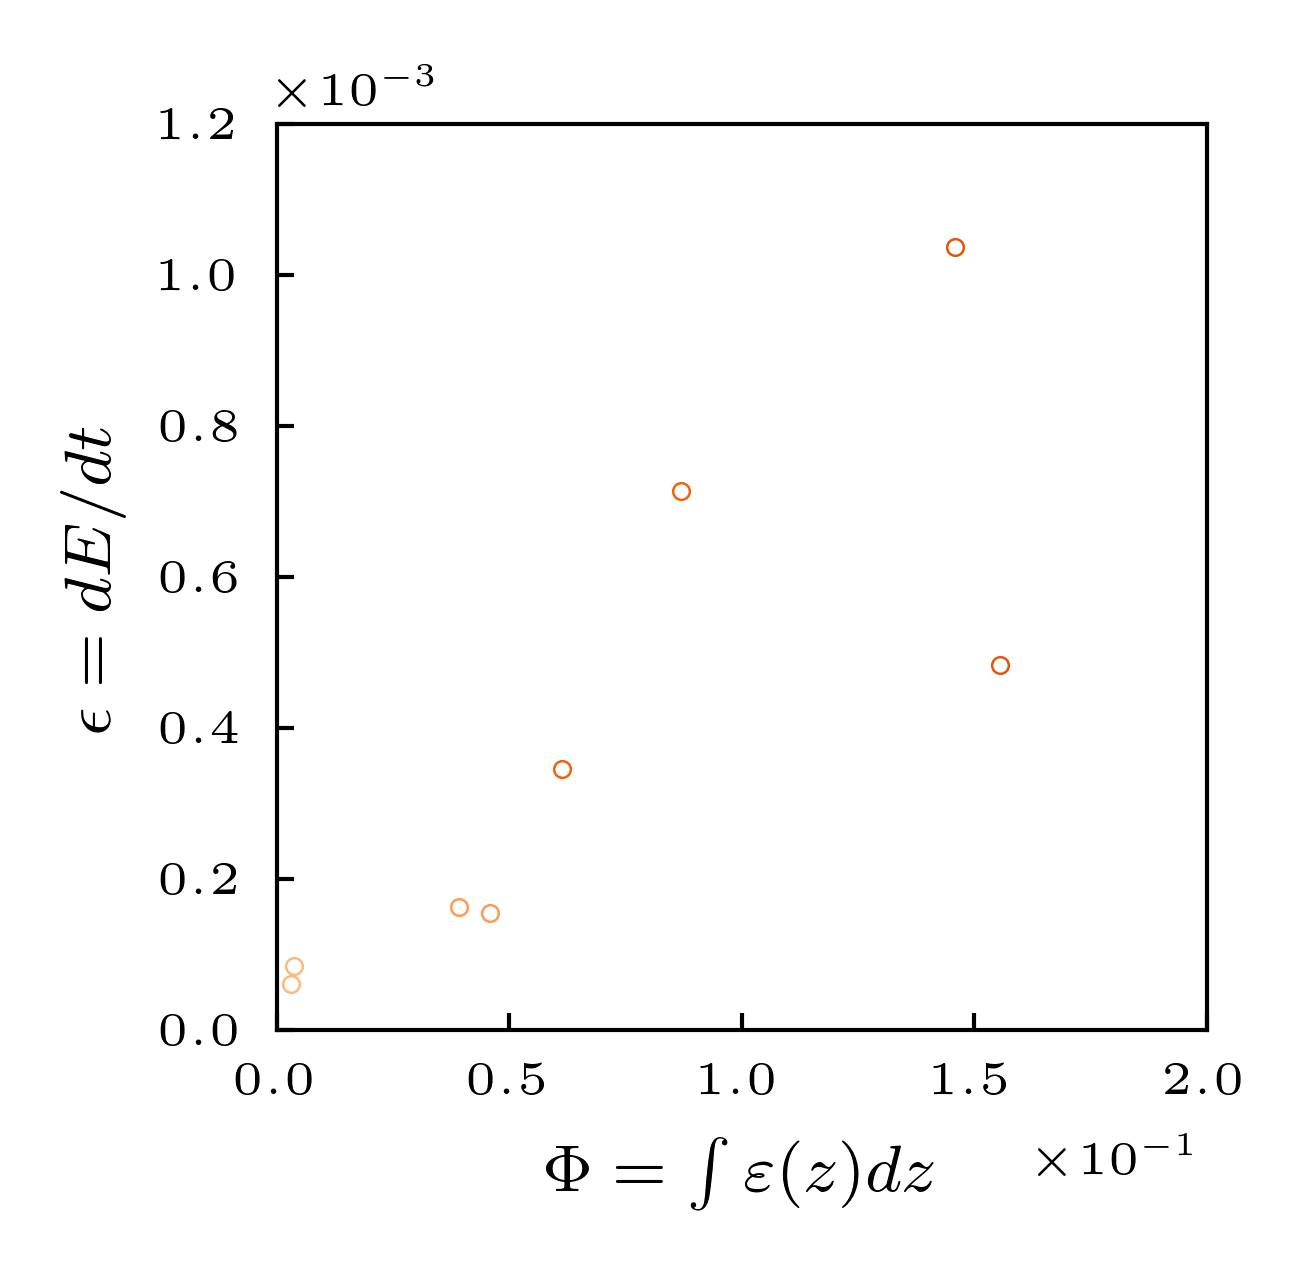

In [180]:
''' Energy against phi '''
fig = plt.figure(figsize=[2,2]); ax = plt.gca()
phi = [[0.0030622, 0.0036038], [0.0459108, 0.0391686], [0.0868916, 0.0612781], [0.1459118, 0.1554606]]

for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            data1 = (case.dEdt[0]+case.dEdt[1])/2/case.config.L0**2
            data2 = (case.dEdt[2]+case.dEdt[3])/2/case.config.L0**2
            plt.plot(phi[k], [data1,data2], 'o', c=case.cc)

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlim([0,0.2]); ax.set_ylim([0,0.0012])
ax.set_xlabel(r'$\Phi=\int \varepsilon(z) dz$'); ax.set_ylabel('$\epsilon=dE/dt$')

In [132]:
def get_spectrum (eta, L, N):
    kmod, theta, Fkmod = spectrum_integration_log(eta, CHECK=False, L=L, N=N)
    mu, Hs = steepness_trunc_non_uniform (Fkmod, kmod)
    mu_plateau = mu[-1]
#     Hskp = np.var(eta)**0.5*4*case.config.kp
#     config.kmod, config.Fkmod = case.kmod, case.Fkmod
    return kmod, Fkmod

''' Get the sigma in the middle of the time window, but choose color to be the first sigma '''
# for k, config in enumerate(config_set[:4]):
#     for case in config.cases:
#         if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             case.sigma = []
#             for i, tseries in enumerate(tseries_ensem):
#                 t = (tseries[0] + tseries[-1]) / 2
#                 eta = case.read_t(fieldname='eta', t=t) 
#                 L = case.config.L0; N = 2**case.LEVEL
#                 slope = get_mss (eta, L, N)
#                 case.sigma.append(slope)
#             case.sigma = np.array(case.sigma) 
#             case.cc = plt.cm.get_cmap('Oranges')((case.sigma[0]-0.05)/0.15)

Bt = 1.1*10**(-3) # The saturation threshold

for k, config in enumerate(config_set[0:4]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            
            case.bfactor_ensem = []
            case.Afactor_ensem = []
            case.weighted_fifth_ensem = []
            case.Bbins_ensem = []
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                ''' Compute spectrum '''
                t = (tseries_ensem[i][0] + tseries_ensem[i][-1]) / 2
                eta = case.read_t(fieldname='eta', t=t)
                L = case.config.L0; N = 2**case.LEVEL
                kmod, Fkmod = get_spectrum (eta, L, N)
                ''' Compute the weighted fifth moment etc.'''
                lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                Bbins = np.interp(9.8/bins_plotting**2, kmod, Fkmod*kmod**3) # the saturation of the c bin interpolated from spectrum
                bfactor = (np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin  
                fifth_alter = np.nansum(lambdac*(bins[2] - bins[1])*bins_plotting**5*bfactor) # this fifth is with k-dependent b
                A = case.dEdt[i]/case.config.L0**2/fifth_alter*9.8
                case.bfactor_ensem.append(bfactor)
                case.Afactor_ensem.append(A)
                case.weighted_fifth_ensem.append(lambdac*(bins[2] - bins[1])*bins_plotting**5*bfactor)
                case.Bbins_ensem.append(Bbins)

/tmp/ipykernel_99315/1572684536.py:45: RuntimeWarning: invalid value encountered in power
  bfactor = (np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin


In [170]:
for k, config in enumerate(config_set[0:4]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(np.round(case.Afactor_ensem))

[ 207. 1122.  207.  108.]
[49. 70. 53. 66.]
[23. 21. 20. 25.]
[18. 17. 14. 15.]


[23.120689982298988, 21.080651392574584, 20.08855185016329, 24.63053601412625]


(0.0, 8.0)

<Figure size 1200x1200 with 0 Axes>

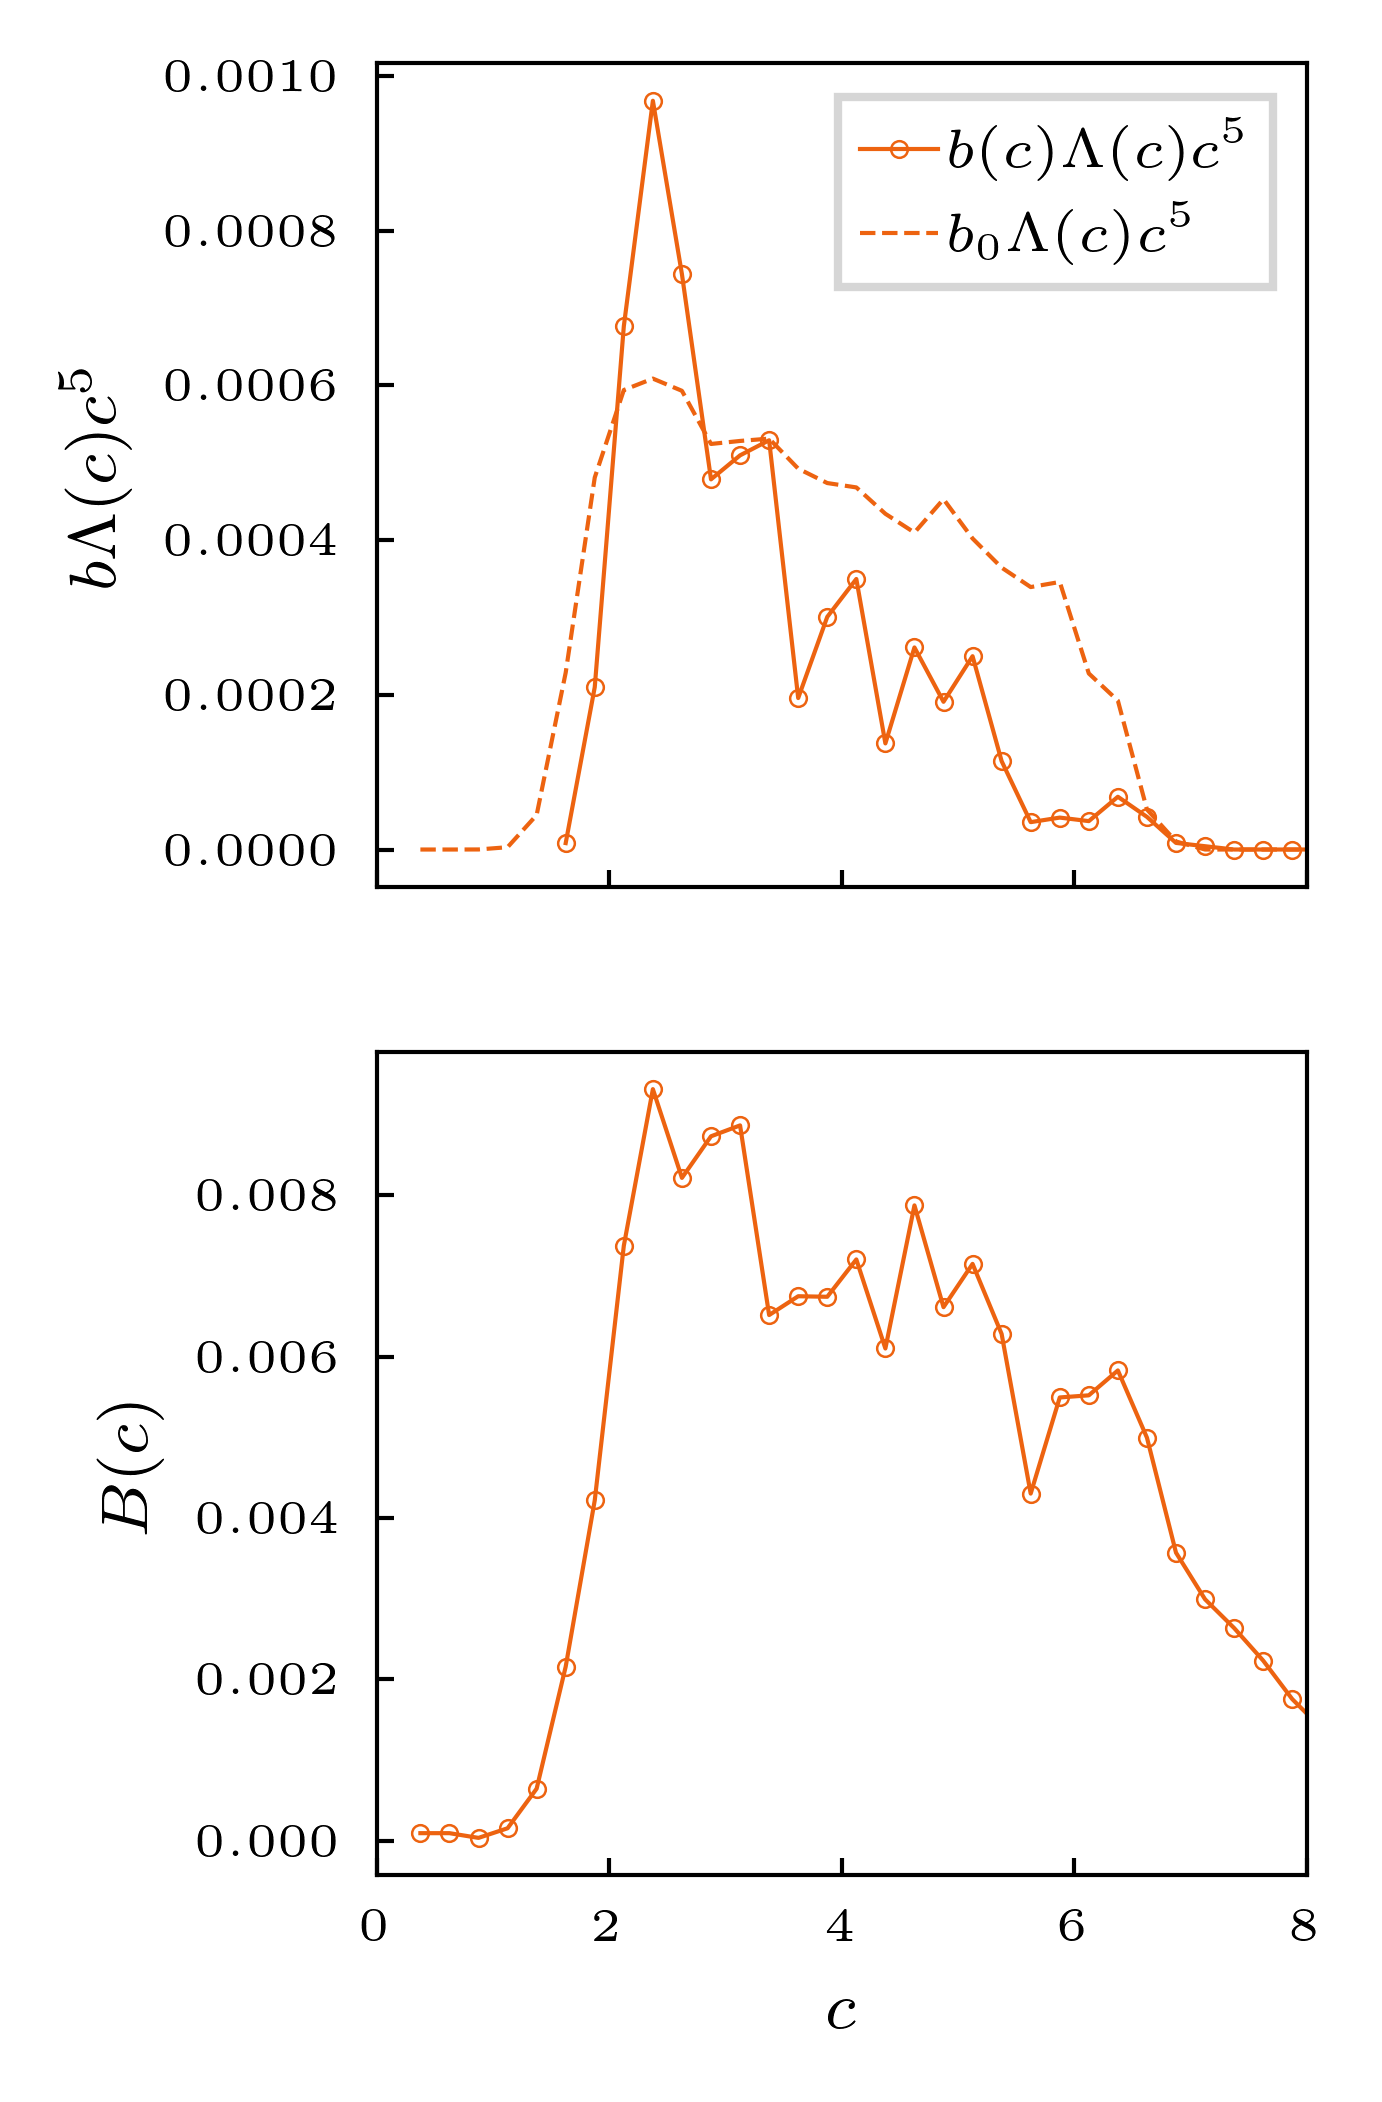

In [133]:
plt.figure(figsize=[2,2])
f, (ax1, ax2) = plt.subplots(2, 1, figsize=[2,4], sharex=True)

for k, config in enumerate(config_set[2:3]):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#             print(case.bfactor_ensem)
            print(case.Afactor_ensem)
            for i,hist in enumerate(case.hist_ensem['hist_ensem'][1:2]):
                bins = case.hist_ensem['bins']
                bins_plotting = bins[1:] - (bins[2] - bins[1])/2
                lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                ax1.plot(bins_plotting, case.Afactor_ensem[i]*case.weighted_fifth_ensem[i], '-o', c=case.cc, label='$b(c){\Lambda(c)}c^5$')
                ax1.plot(bins_plotting, case.bconstant[i]*lambdac*(bins[2] - bins[1])*bins_plotting**5, '--', c=case.cc,
                        label='$b_0{\Lambda(c)}c^5$')
                
            ax2.plot(bins_plotting, case.Bbins_ensem[1], '-o', c=case.cc, label='$b(c){\Lambda(c)}c^5$')
                
ax2.set_xlabel('$c$'); ax1.set_ylabel('$b{\Lambda(c)}c^5$'); ax2.set_ylabel('$B(c)$')
ax1.legend()
ax1.set_xlim([0,8])

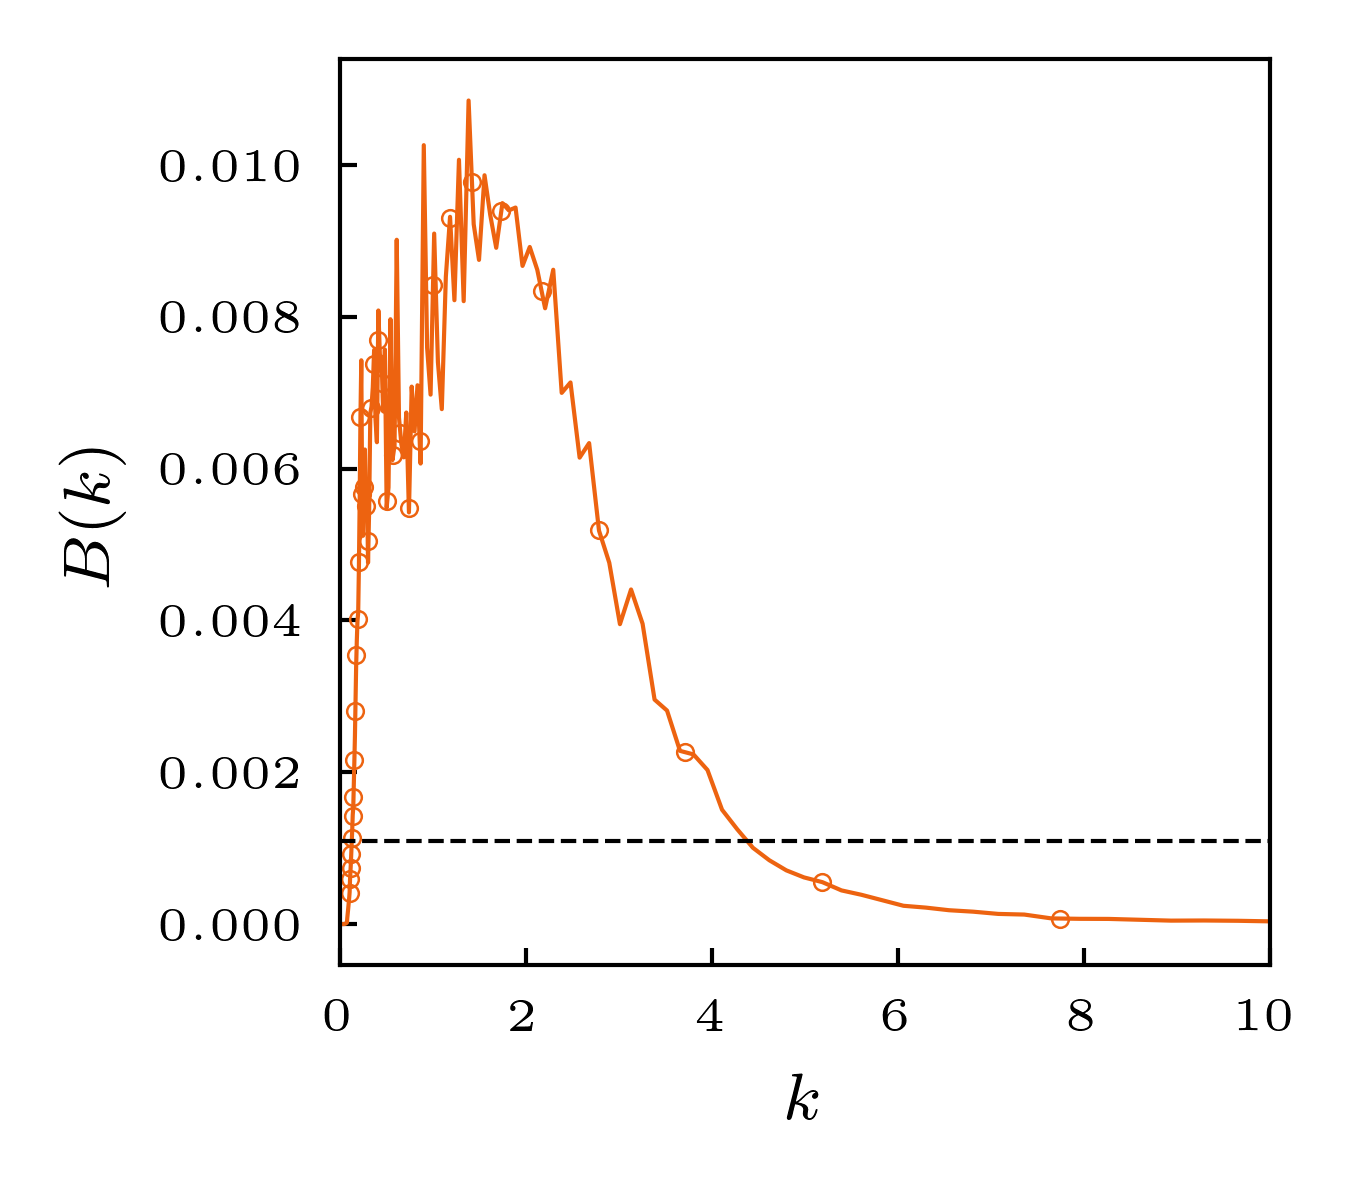

In [144]:
plt.figure(figsize=[2,2])
plt.plot(kmod,Fkmod*kmod**3,c=case.cc, lw=0.5)
Bbins = np.interp(9.8/bins_plotting**2, kmod, Fkmod*kmod**3)
kbins = 9.8/bins_plotting**2
plt.plot(kbins,Bbins,'o', c=case.cc)
# print(kbins.max())
plt.xlim([0,10])
plt.xlabel('$k$'); plt.ylabel('$B(k)$')
plt.axhline(y=1.1*10**(-3), color = 'k', linestyle = '--')

### Older code

In [ ]:
""" Directly load the breaking statistics from pickle and compute an energy dissipation """
fig = plt.figure(figsize=[2,2])
for k, config in enumerate(config_set[0:-2]):
    for case in config.cases:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            energy = read(case.path +'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            print(case.dEdt)
            case.omegap = (case.config.kp*9.8)**0.5
            l1 = plt.plot(energy.t*case.omegap, (energy.ke+energy.gpe)/(energy.ke[0]+energy.gpe[0]), c=case.cc)
            l2 = plt.plot(energy.t*case.omegap, (2*energy.gpe)/(energy.ke[0]+energy.gpe[0]), '--', c=case.cc)
            
# plt.ylim([0.6,1])
# plt.xlim([0,200])
# plt.xlabel('$t$')
# plt.ylabel('$E/E_0$')

plt.ylim([0.6,1])
plt.xlim([0,250])
plt.xlabel('$\omega_p t$')
plt.ylabel('$E/E_0$')
plt.legend([l1,l2],['$E_p+E_k/E_0$','$2E_p/E_0$'])



/tmp/ipykernel_120671/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_120671/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_120671/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_120671/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',
/tmp/ipykernel_120671/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = 

1.377500000000009
3.202500000000009
12.8
20.03749999999991
1578.0
2148.5


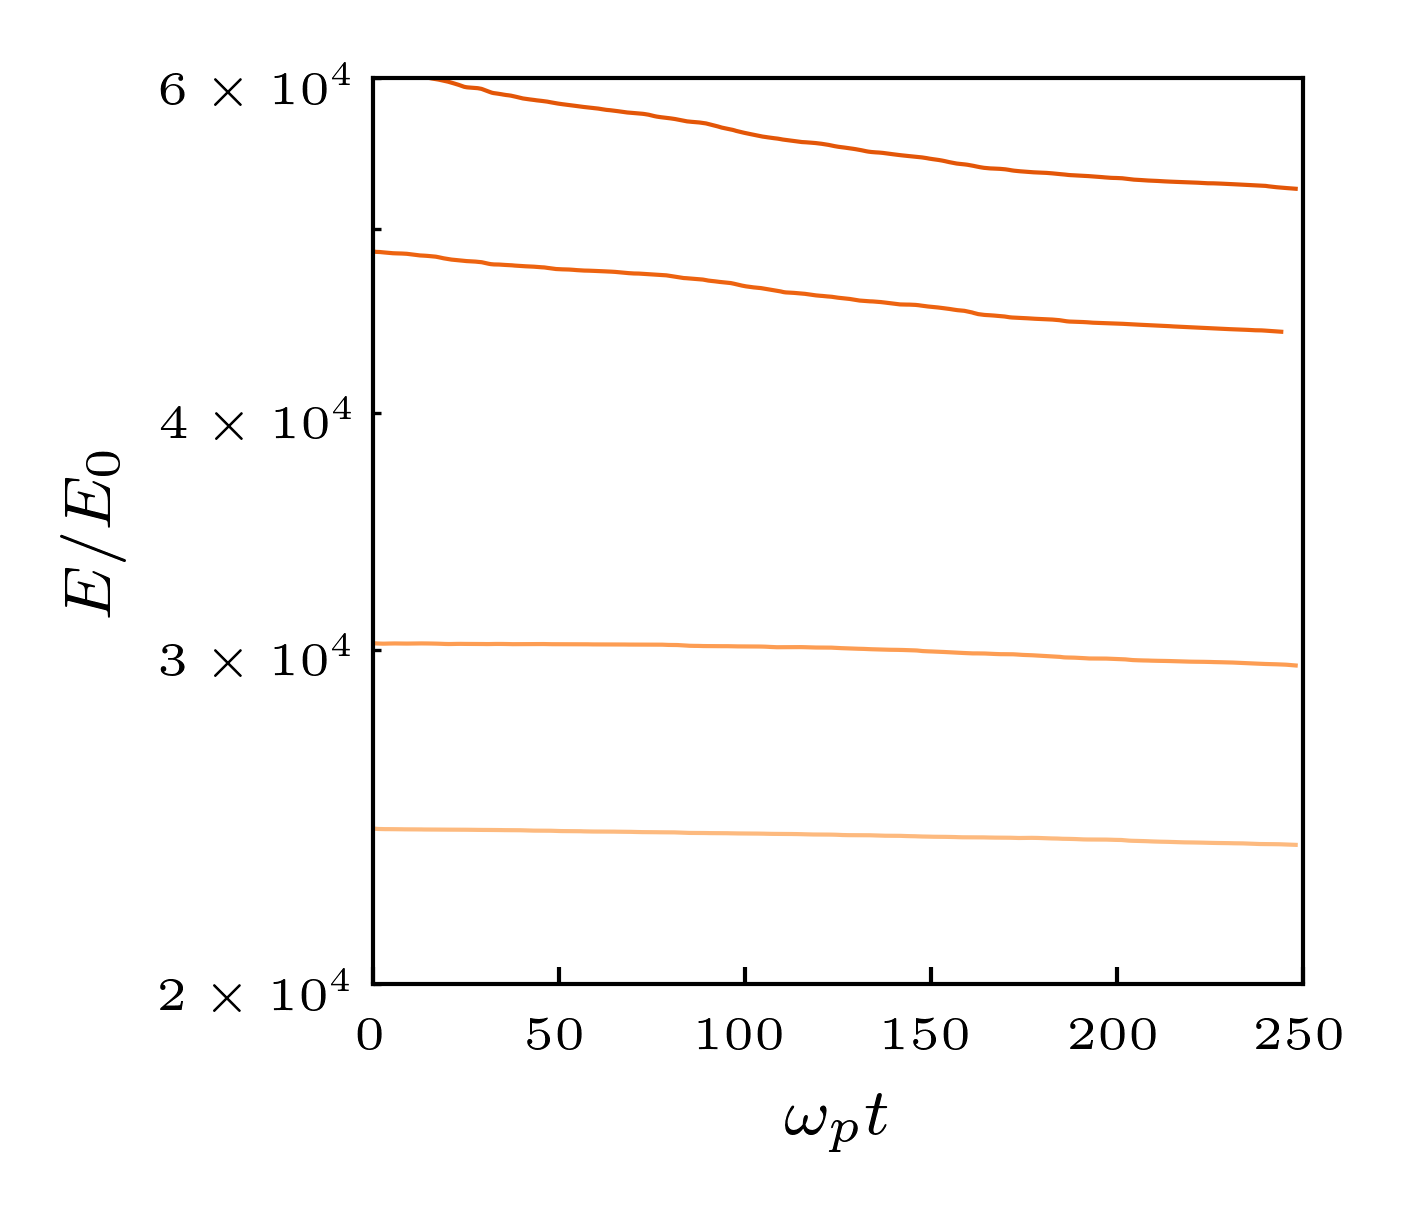

In [14]:
""" Directly load the breaking statistics from pickle and compute an energy dissipation """
fig = plt.figure(figsize=[2,2])
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            energy = read(case.path +'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            print(case.dEdt)
            case.omegap = (case.config.kp*9.8)**0.5
            plt.plot(energy.t*case.omegap, (energy.ke+energy.gpe), c=case.cc)
            
# plt.ylim([0.6,1])
# plt.xlim([0,200])
# plt.xlabel('$t$')
# plt.ylabel('$E/E_0$')

plt.ylim([2*10**4,6*10**4])
plt.xlim([0,250])
plt.xlabel('$\omega_p t$')
plt.ylabel('$E/E_0$')
plt.yscale('log')

In [6]:
""" Directly load the breaking statistics from pickle and compute an energy dissipation """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            print (case.path)
            energy = read(case.path +'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            picklename = case.path + 'breakingstat.pkl'
            case.hist_ensem = load_object(picklename)

/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/


/tmp/ipykernel_5403/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',


/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/


In [13]:
# Energy from eta and energy from output
config = config2_1
case = config.cases[0]
energy = read(case.path +'energy_after_remap.dat')
eta = case.read_t(fieldname='eta', t=0)  
print(np.var(eta)*9.8)
print(energy.total[0]/200/200)

0.75172668248415
0.75593


/tmp/ipykernel_6135/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',


In [6]:
from spectrum_func import spectrum_integration_log, steepness_trunc_non_uniform, spectrum_integration_linear

""" Spectrum AT t=110! """
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=110)  
#             case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
            case.mu_plateau = case.mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            config.kmod, config.Fkmod = case.kmod, case.Fkmod
            print(case.Hskp, case.mu_plateau)
            
""" And then assign color, EITHER by kpHs OR by mu """            
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
#             case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35) # colored by kpHs
            case.cc = plt.cm.get_cmap('Oranges')((case.mu_plateau-0.05)/0.15) # colored by sigma

0.15487869329381496 0.09964819204475146
0.17324778271355945 0.11615273529634568
0.2133536228950277 0.1471242077302186
0.23310416670955753 0.15458009671050463
0.28327761010676605 0.17534834953023729
0.31774053202000274 0.18047226428782415
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/JFM/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/


P=0.008
P=0.01
P=0.016
P=0.02
P=0.05
P=0.07


Text(0, 0.5, '$\\Lambda(c)c^5$')

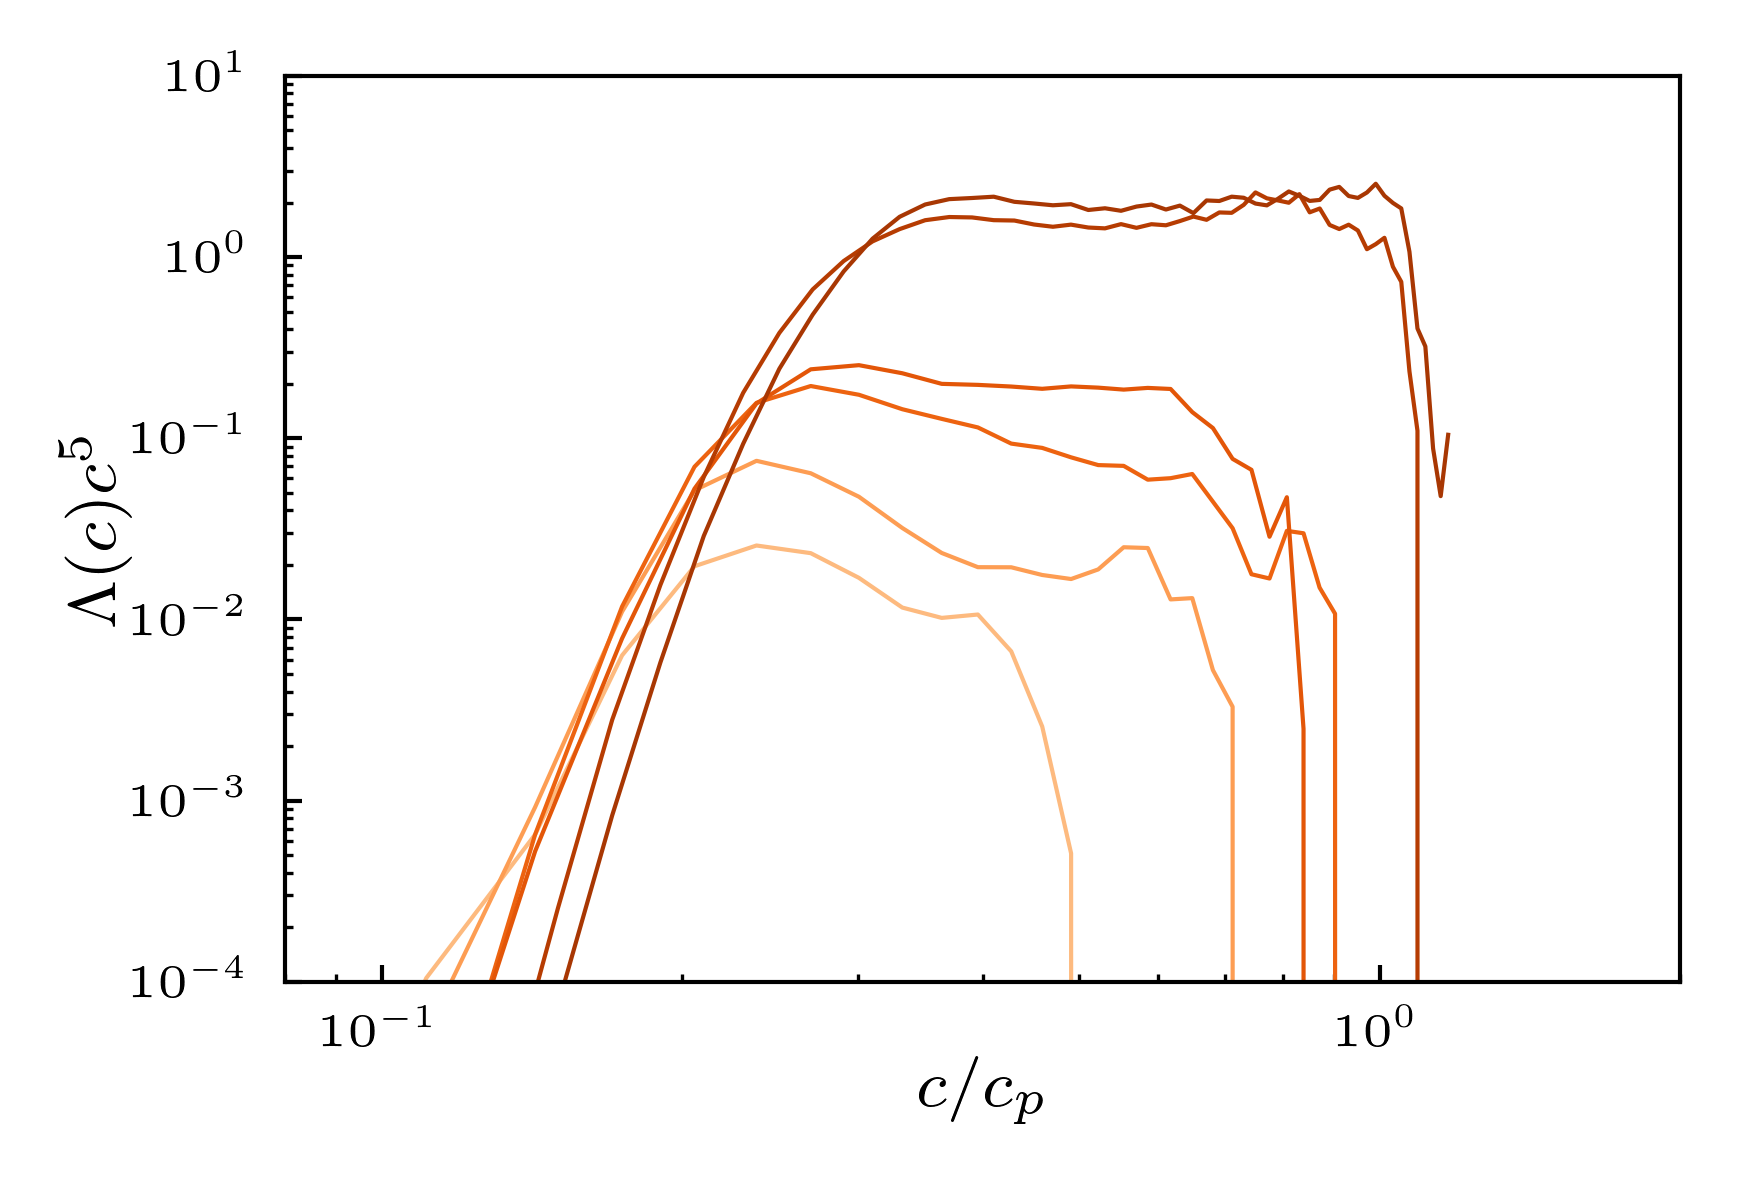

In [12]:
""" Energy dissipation distribution from Lambda(c). """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()

zeroth_ensem = []
first_ensem = []
fifth_ensem = []

for k, config in enumerate(config_set):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#             case.cc = 'k'
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    case.cp = (9.8/config.kp)**0.5
                    lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                    plt.plot(bins_plotting/case.cp, lambdac*bins_plotting**5, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=0.5)            # The extra filter 
                    zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))
                    fifth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting**5))

plt.xscale('log'); plt.yscale('log')
plt.xlim([0.08,2])
plt.ylim([10**(-4),10**(1)])
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c^5$', labelpad=0)

P=0.008
P=0.01
P=0.016
P=0.02
P=0.05
P=0.07


Text(0, 0.5, '$B(k)$')

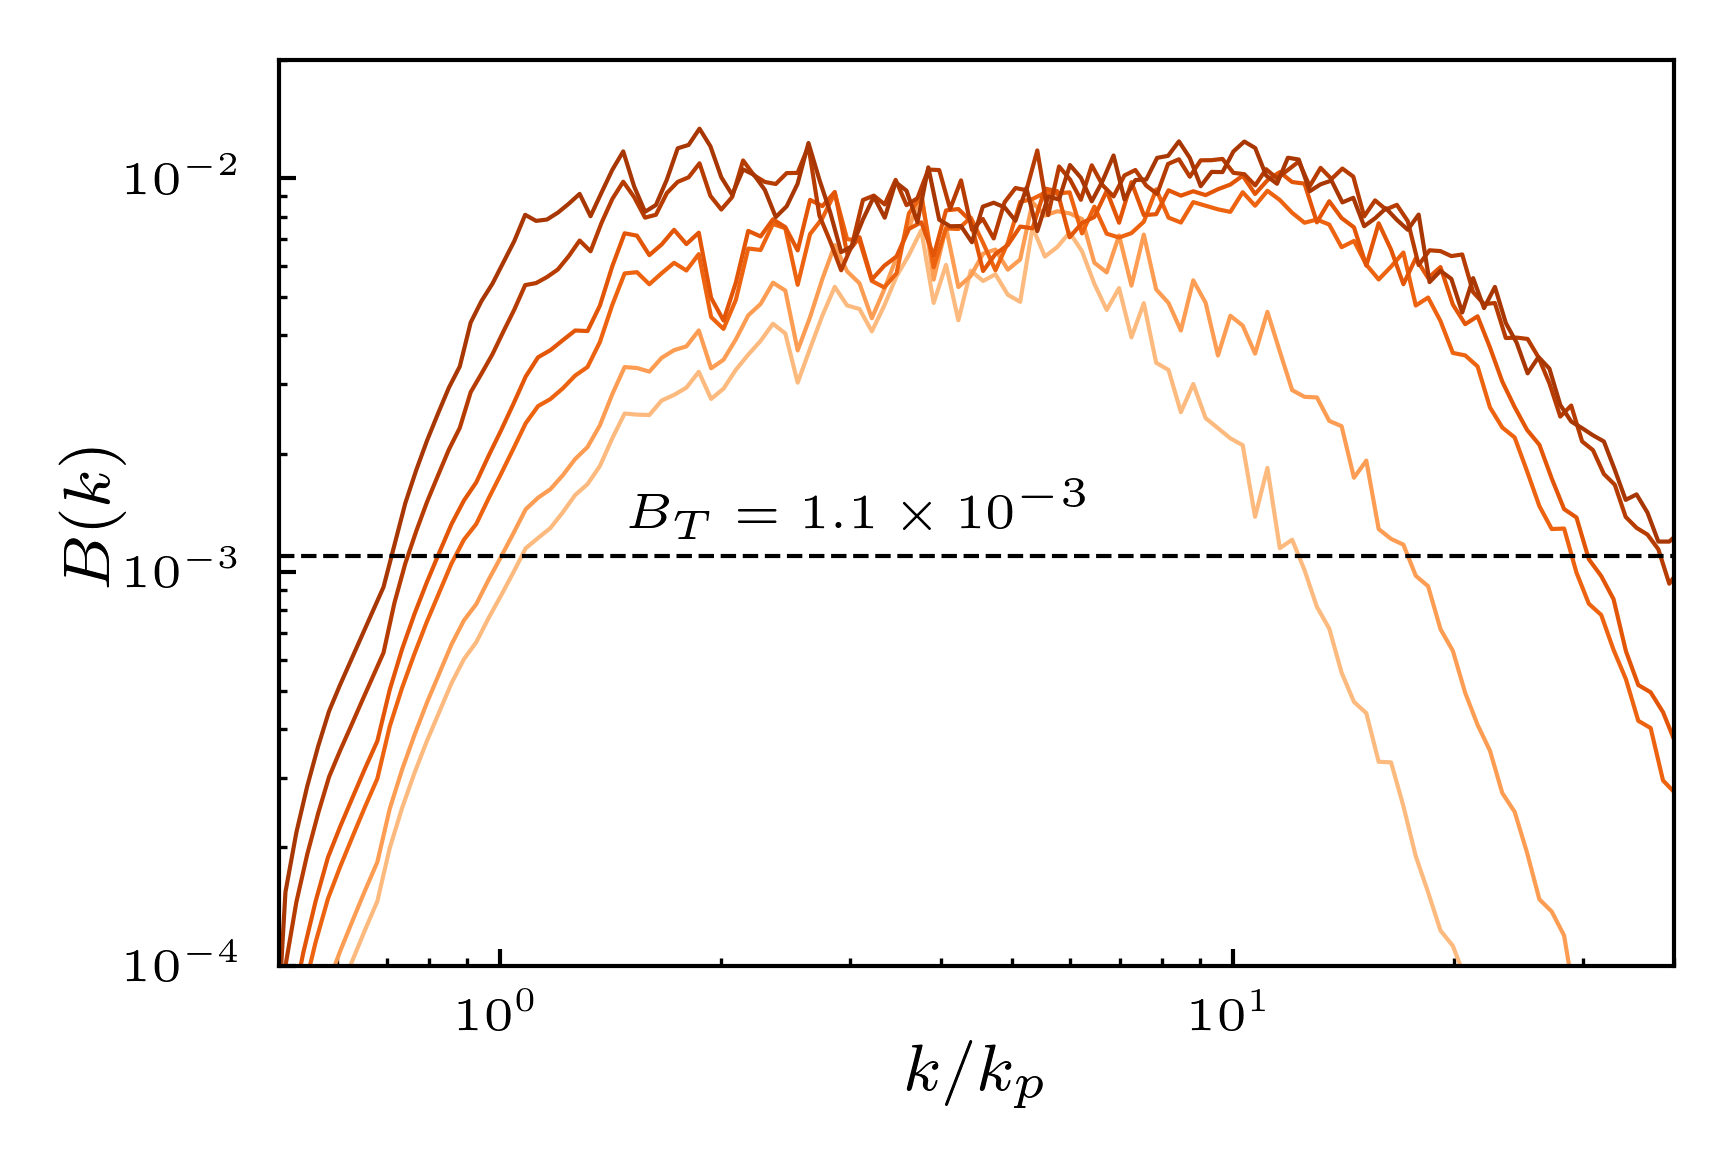

In [153]:
""" Saturation B(k) """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()

for k, config in enumerate(config_set):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            plt.plot(case.kmod/config.kp, case.Fkmod*case.kmod**3, c=case.cc, alpha=1, lw=0.5)           

plt.xscale('log'); plt.yscale('log')

# plt.xlim([0.04,4.])
plt.xlim([0.5,40.])
plt.ylim([10**(-4),2*10**(-2)])
plt.axhline(y=1.1*10**(-3), color = 'k', linestyle = '--')
plt.annotate(r'$B_T = 1.1\times10^{-3}$', (1.5, 1.3*10**(-3)), fontsize=6)
 
plt.xlabel(r'$k/k_p$', labelpad=0)
plt.ylabel(r'$B(k)$', labelpad=0)

In [10]:
config_set1 = [config2_9,config2_1,config2_10,config2_2] # Choice of configurations
config_set2 = [config3_2,config3_3]
config_set = [*config_set1, *config_set2] 

AttributeError: 'Realization' object has no attribute 'b'

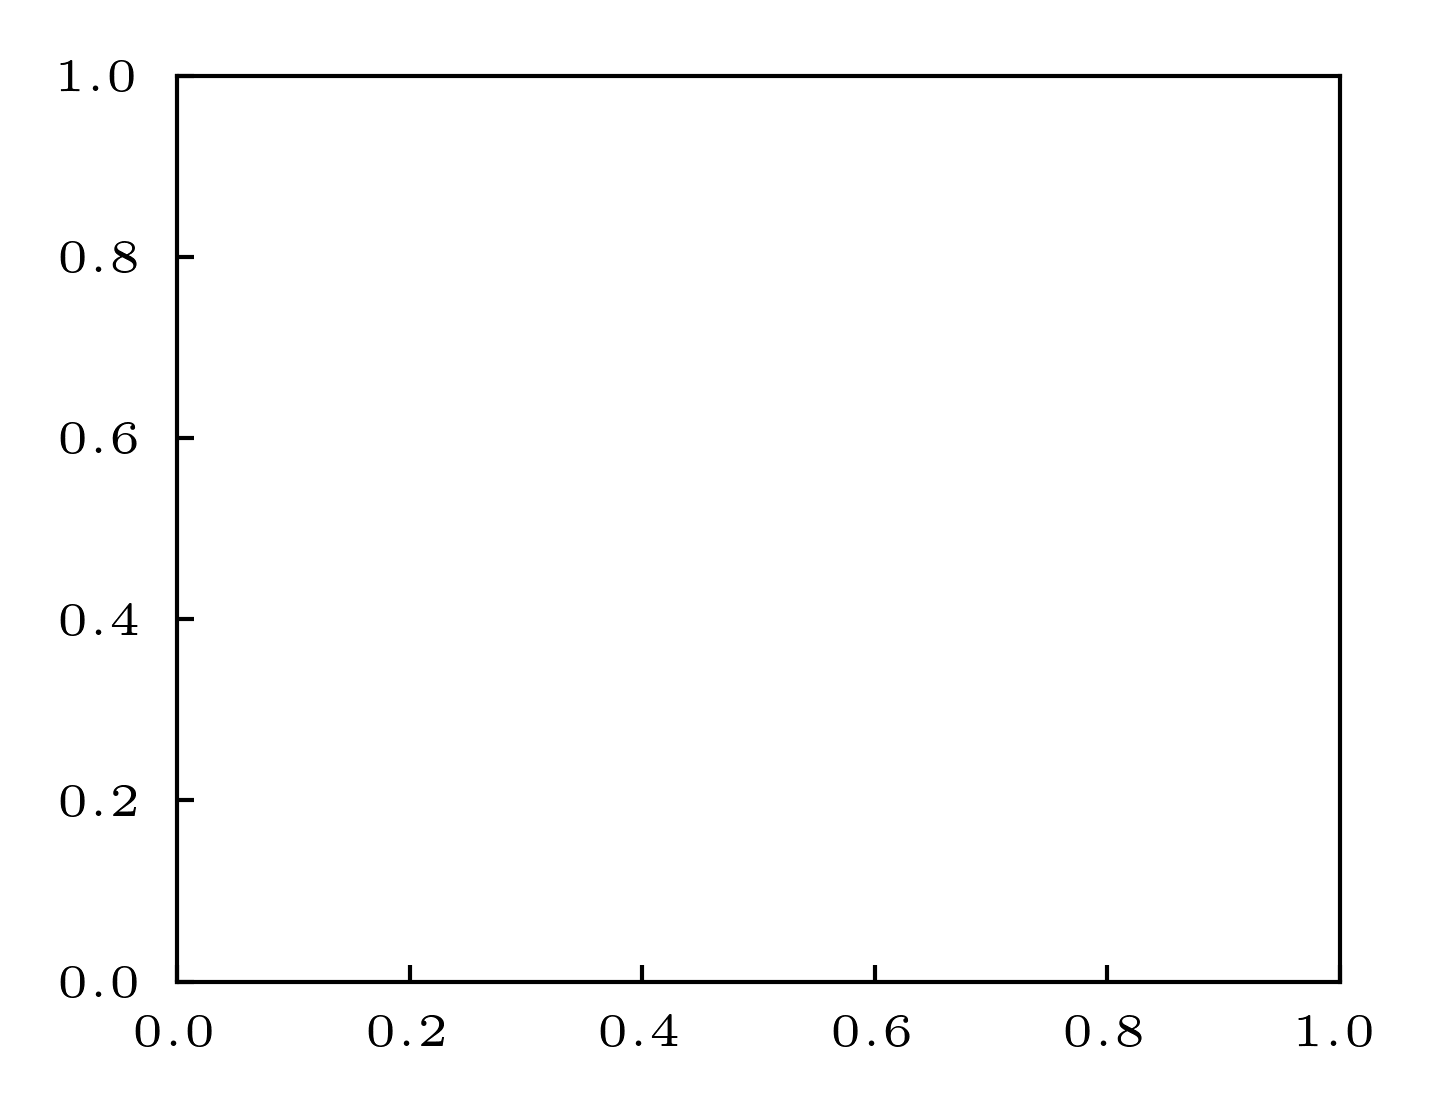

In [11]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()

config = config2_9
bconst = 0.01 # from linear fit

for j,case in enumerate(config.cases):
    if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
        bins = case.hist_ensem['bins']
        bins_plotting = bins[1:] - (bins[2] - bins[1])/2
        for i,hist in enumerate(case.hist_ensem['hist_ensem']):
            if case.Htheta == 0.503:
                lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                plt.plot(bins_plotting, lambdac*bins_plotting**5*case.b, label=r'$b=%.3f$' %case.b, c=case.cc, linestyle='-', alpha=1, lw=0.5)            # The extra filter 
                plt.plot(bins_plotting, lambdac*bins_plotting**5*case.bfactor*case.A, c=case.cc, label=r'$b=%.1f(B(k)^{1/2}-B_T^{1/2})^{5/2}$' %case.A, linestyle='--', alpha=1, lw=0.5)            # The extra filter 

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.5,10])
plt.ylim([10**(-6),10**(-1)])
 
plt.xlabel(r'$c$', labelpad=0)
plt.ylabel(r'$b\Lambda(c)c^5$', labelpad=0)
plt.legend()


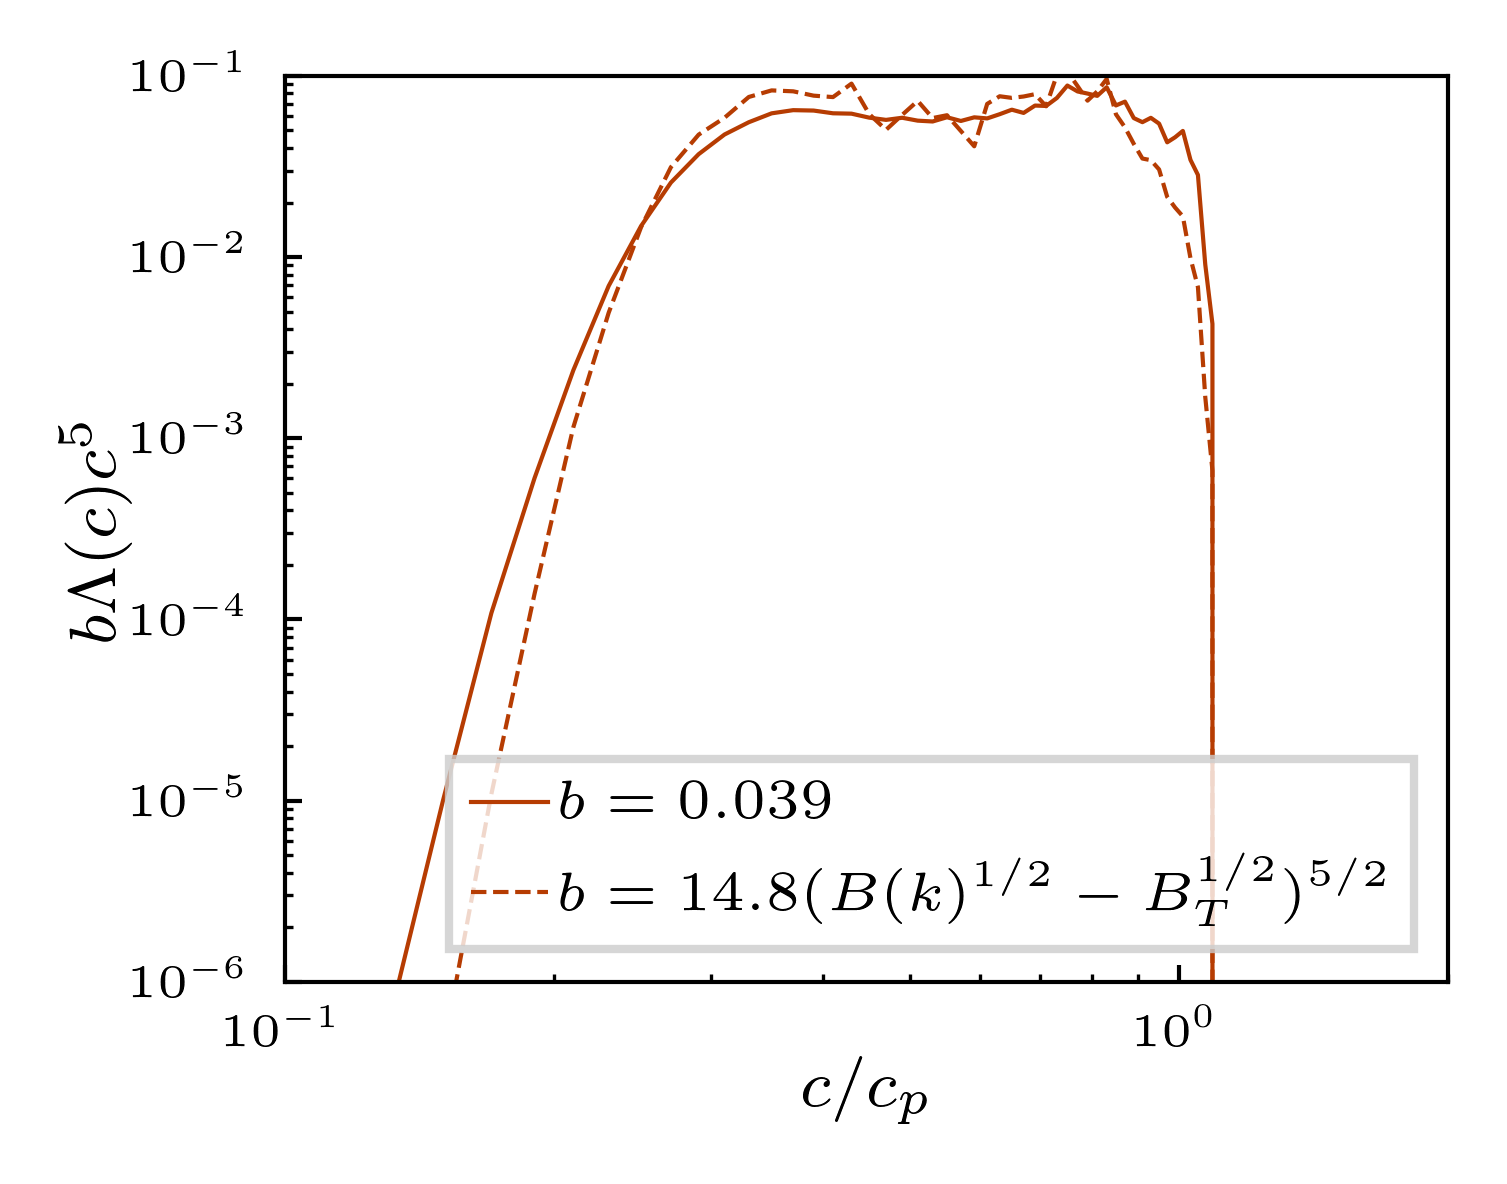

In [156]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()

config = config3_2

for j,case in enumerate(config.cases):
    if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
        bins = case.hist_ensem['bins']
        bins_plotting = bins[1:] - (bins[2] - bins[1])/2
        case.cp = (9.8/config.kp)**0.5
        for i,hist in enumerate(case.hist_ensem['hist_ensem']):
            if case.Htheta == 0.503:
                lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                plt.plot(bins_plotting/case.cp, lambdac*bins_plotting**5*case.b, label=r'$b=%.3f$' %case.b, c=case.cc, linestyle='-', alpha=1, lw=0.5)            # The extra filter 
                plt.plot(bins_plotting/case.cp, lambdac*bins_plotting**5*case.bfactor*case.A, c=case.cc, label=r'$b=%.1f(B(k)^{1/2}-B_T^{1/2})^{5/2}$' %case.A, linestyle='--', alpha=1, lw=0.5)            # The extra filter 

plt.xscale('log'); plt.yscale('log')

plt.xlim([0.1,2])
plt.ylim([10**(-6),10**(-1)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$b\Lambda(c)c^5$', labelpad=0)
plt.legend()


/tmp/ipykernel_252775/631419804.py:16: RuntimeWarning: invalid value encountered in power
  case.bfactor = (np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin


(1e-05, 0.02)

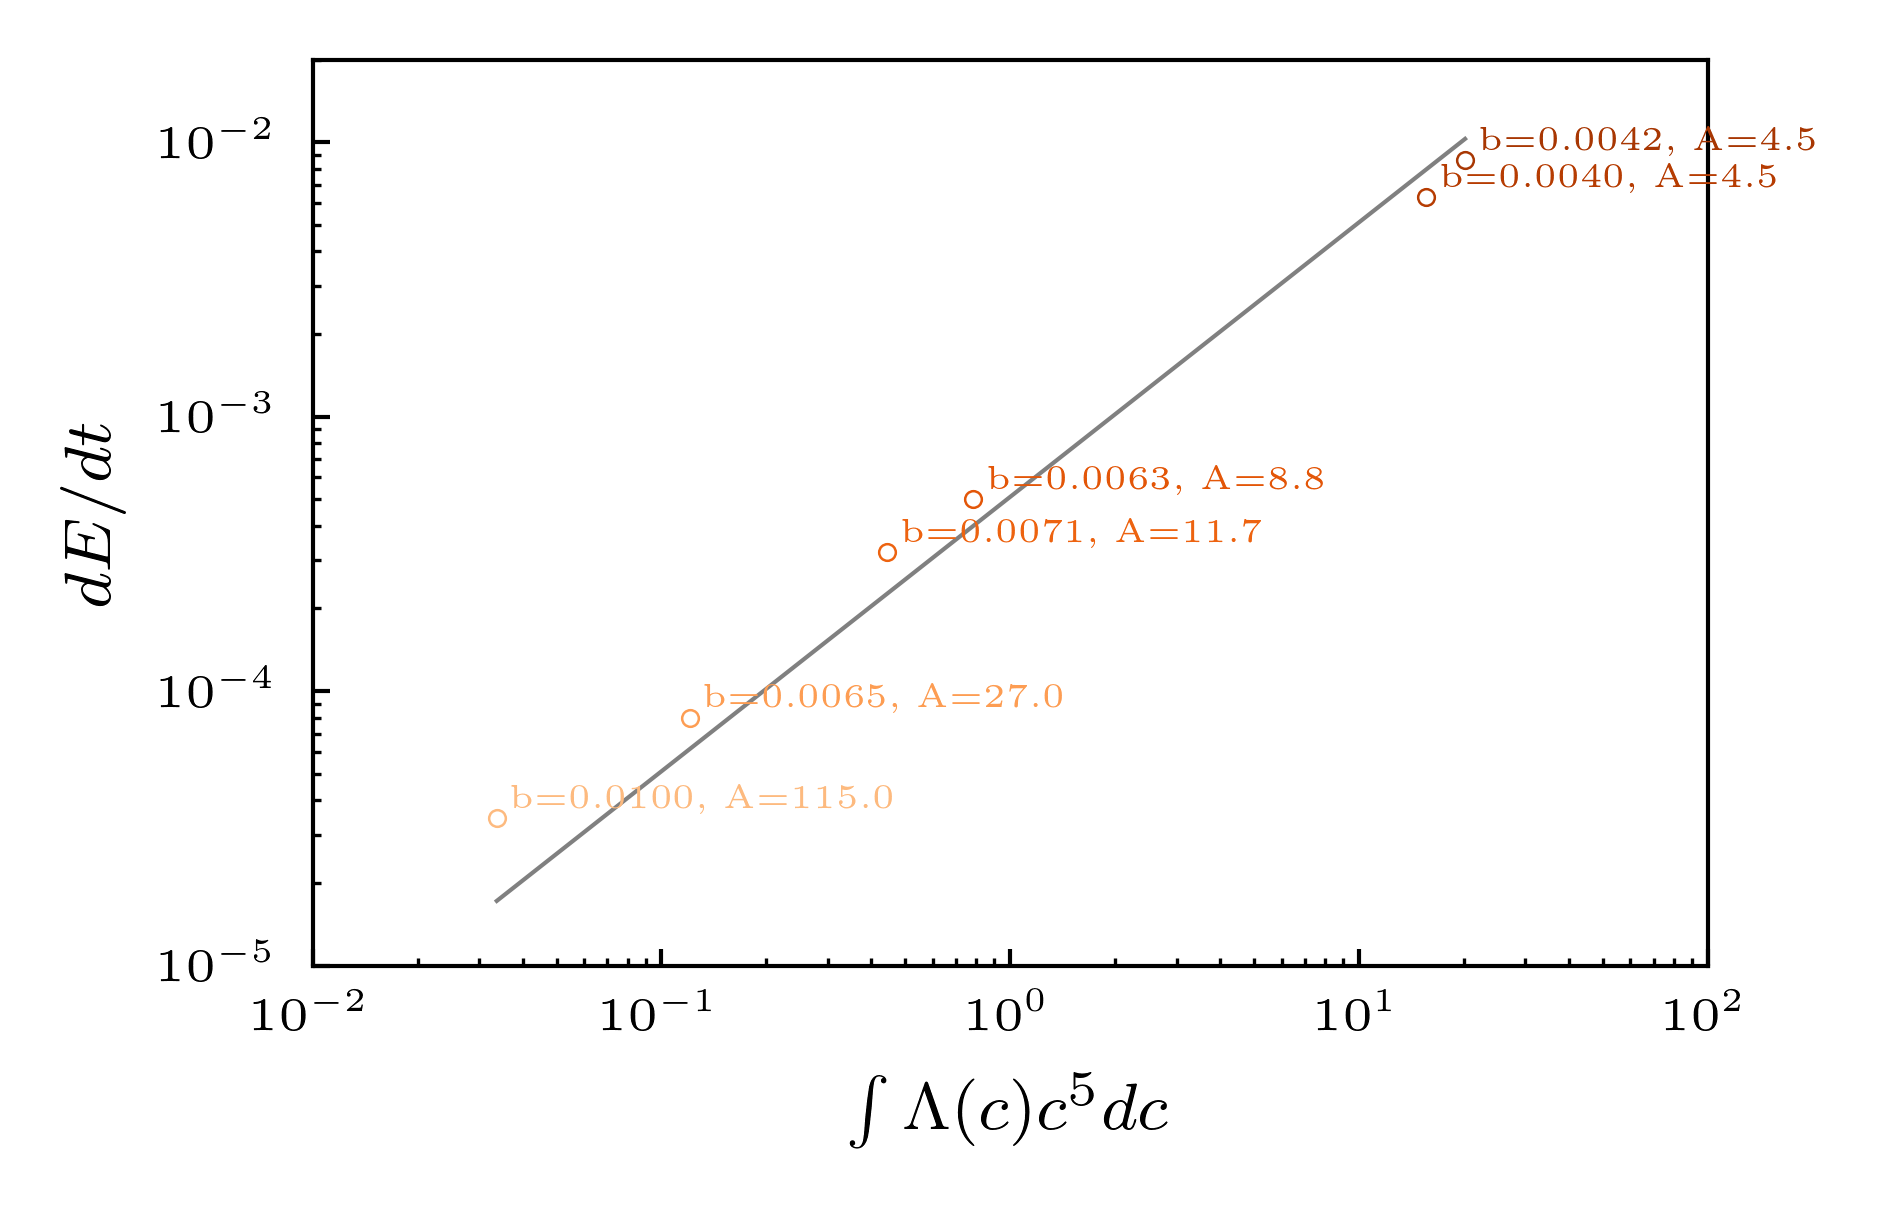

In [21]:
plt.figure(figsize=[3,2])

Bt = 1.1*10**(-3)
for k, config in enumerate(config_set):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            hist = case.hist_ensem['hist_ensem'][0]
            lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
            Bbins = []
            for cbin in bins_plotting:
                B = np.interp(9.8/cbin**2, case.kmod, case.Fkmod*case.kmod**3)
                Bbins.append(B)
            
            case.bfactor = (np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin  
            case.fifth = np.nansum(lambdac*(bins[2] - bins[1])*bins_plotting**5*case.bfactor) 

            case.b = case.dEdt/case.config.L0**2/fifth_ensem[k]*9.8
            case.A = case.dEdt/case.config.L0**2/case.fifth*9.8
            
            plt.plot(fifth_ensem[k], case.dEdt/case.config.L0**2, 'o', c=case.cc)
            plt.annotate('b=%.4f, A=%.1f' %(case.b,case.A), (fifth_ensem[k]*1.1,case.dEdt/case.config.L0**2*1.1), fontsize=4, c=case.cc)
            
plt.yscale('log'); plt.xscale('log')
plt.xlabel(r'$\int\Lambda(c)c^5dc$'); plt.ylabel(r'$dE/dt$')
plt.xlim([0.01,100]); plt.ylim([0.00001,0.02])

/tmp/ipykernel_252775/331277491.py:21: RuntimeWarning: invalid value encountered in power
  case.bfactor = A*(np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin


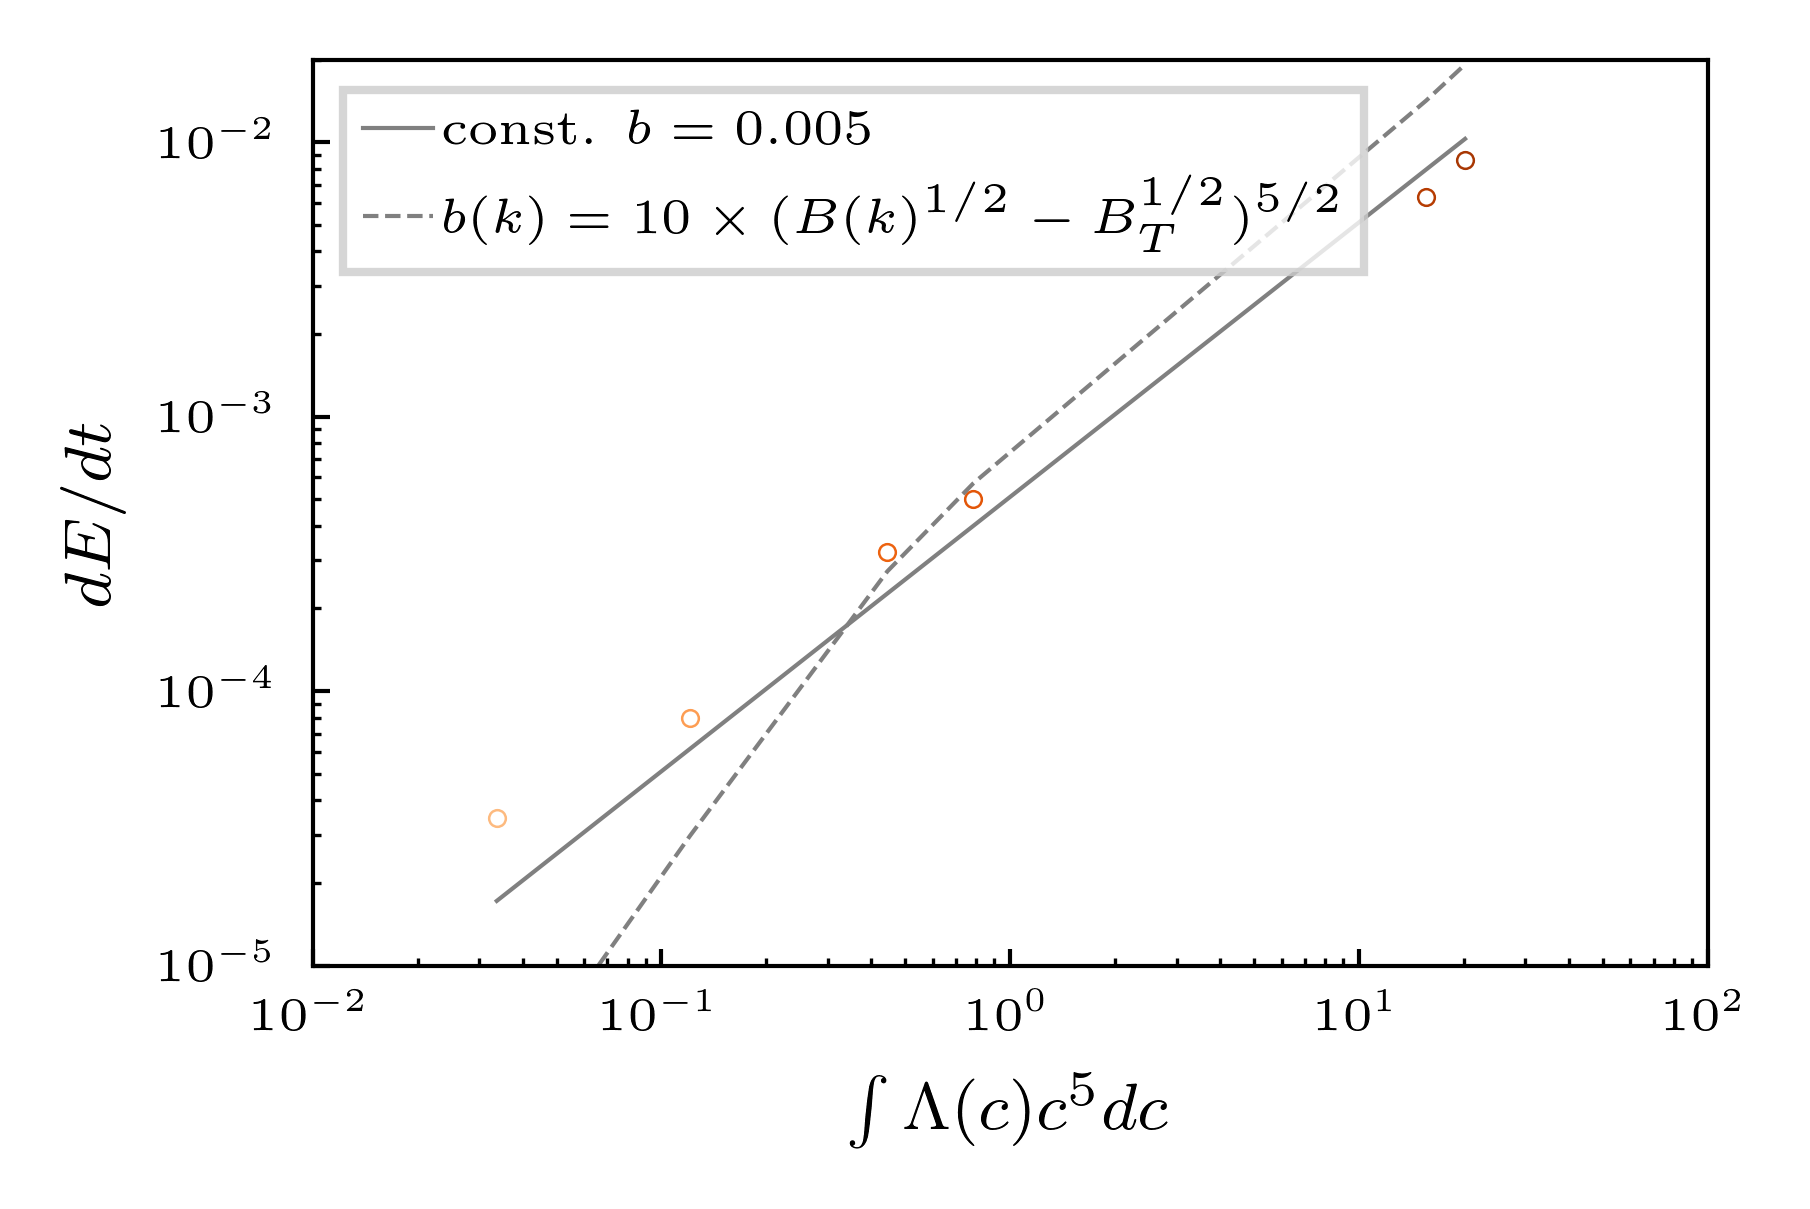

In [30]:
plt.figure(figsize=[3,2])

Bt = 1.1*10**(-3)
fifth_alter = []
for k, config in enumerate(config_set):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            hist = case.hist_ensem['hist_ensem'][0]
            lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
            Bbins = []
            for cbin in bins_plotting:
                B = np.interp(9.8/cbin**2, case.kmod, case.Fkmod*case.kmod**3)
                Bbins.append(B)
                
            case.b = case.dEdt/case.config.L0**2/fifth_ensem[k]*9.8
            A = 10 # Assign A
            
            case.bfactor = A*(np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin  
            case.fifth = np.nansum(lambdac*(bins[2] - bins[1])*bins_plotting**5*case.bfactor) 
            
            plt.plot(fifth_ensem[k], case.dEdt/case.config.L0**2, 'o', c=case.cc)
#             plt.annotate('b=%.4f, A=%.1f' %(case.b,case.A), (fifth_ensem[k]*1.1,case.dEdt/case.config.L0**2*1.1), fontsize=4, c=case.cc)
    
            fifth_alter.append(case.fifth)    

''' All the different fits '''
plt.plot(fifth_ensem, np.array(fifth_ensem)*0.005/9.8, c='gray', label='const. $b=0.005$')
plt.plot(fifth_ensem, np.array(fifth_alter)/9.8, '--', c='gray', label=r'$b(k) = 10\times(B(k)^{1/2}-B_T^{1/2})^{5/2}$')
            
plt.yscale('log'); plt.xscale('log')
plt.xlabel(r'$\int\Lambda(c)c^5dc$'); plt.ylabel(r'$dE/dt$')
plt.xlim([0.01,100]); plt.ylim([0.00001,0.02])
plt.legend(fontsize=6)

In [ ]:
plt.figure(figsize=[3,2])

Bt = 1.1*10**(-3)
fifth_alter = []
for k, config in enumerate(config_set):
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            hist = case.hist_ensem['hist_ensem'][0]
            lambdac = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
            Bbins = []
            for cbin in bins_plotting:
                B = np.interp(9.8/cbin**2, case.kmod, case.Fkmod*case.kmod**3)
                Bbins.append(B)
                
            case.b = case.dEdt/case.config.L0**2/fifth_ensem[k]*9.8
            A = 10 # Assign A
            
            case.bfactor = A*(np.array(Bbins)**0.5 - Bt**0.5)**2.5  # same dimension as the cbin  
            case.fifth = np.nansum(lambdac*(bins[2] - bins[1])*bins_plotting**5*case.bfactor) 
            
            plt.plot(fifth_ensem[k], case.dEdt/case.config.L0**2, 'o', c=case.cc)
#             plt.annotate('b=%.4f, A=%.1f' %(case.b,case.A), (fifth_ensem[k]*1.1,case.dEdt/case.config.L0**2*1.1), fontsize=4, c=case.cc)
    
            fifth_alter.append(case.fifth)    

''' All the different fits '''
plt.plot(fifth_ensem, np.array(fifth_ensem)*0.005/9.8, c='gray', label='const. $b=0.005$')
plt.plot(fifth_ensem, np.array(fifth_alter)/9.8, '--', c='gray', label=r'$b(k) = 10\times(B(k)^{1/2}-B_T^{1/2})^{5/2}$')
            
plt.yscale('log'); plt.xscale('log')
plt.xlabel(r'$\int\Lambda(c)c^5dc$'); plt.ylabel(r'$dE/dt$')
plt.xlim([0.01,100]); plt.ylim([0.00001,0.02])
plt.legend(fontsize=6)

In [18]:
config2_0 = Config(L0=200, P=0.005, prefix='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_')
case = config2_0.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                               path='/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/')
energy = read(case.path +'energy_after_remap.dat')
dEdt0_200m = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40

/tmp/ipykernel_3149028/1993989841.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy, exists = readin(name, table_delimiter = ' ',


In [160]:
for k,config in enumerate(config_set[:]):
    for case in config.cases:
        picklename = case.path + 'vort/fields.pkl'
        case.dict = load_object(picklename)

FileNotFoundError: [Errno 2] No such file or directory: '/projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/vort/fields.pkl'